# Glass Identification

In [2]:
# importing the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

In [3]:
# loading the dataset
df = pd.read_csv('Glass_Identification.csv')
df

1  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.00  0.00.1  1.1
0      2  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.00    0.00    1
1      3  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.00    0.00    1
2      4  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.00    0.00    1
3      5  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.00    0.00    1
4      6  1.51596  12.79  3.61  1.62  72.97  0.64  8.07  0.00    0.26    1
..   ...      ...    ...   ...   ...    ...   ...   ...   ...     ...  ...
208  210  1.51623  14.14  0.00  2.88  72.61  0.08  9.18  1.06    0.00    7
209  211  1.51685  14.92  0.00  1.99  73.06  0.00  8.40  1.59    0.00    7
210  212  1.52065  14.36  0.00  2.02  73.42  0.00  8.44  1.64    0.00    7
211  213  1.51651  14.38  0.00  1.94  73.61  0.00  8.48  1.57    0.00    7
212  214  1.51711  14.23  0.00  2.08  73.36  0.00  8.62  1.67    0.00    7

[213 rows x 11 columns]

In [4]:
# Assign column names to the DataFrame
df.columns = ['Id', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Glass Type']

In [5]:
# Insert the first row of data to DataFrame
df.iloc[-1] = [1, 1.52101, 13.64, 4.49, 1.10, 71.78, 0.06, 8.75, 0.00, 0.00, 1.1]

In [6]:
df

Id       RI     Na    Mg    Al     Si     K    Ca    Ba    Fe  \
0      2  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.00  0.00   
1      3  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.00  0.00   
2      4  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.00  0.00   
3      5  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.00  0.00   
4      6  1.51596  12.79  3.61  1.62  72.97  0.64  8.07  0.00  0.26   
..   ...      ...    ...   ...   ...    ...   ...   ...   ...   ...   
208  210  1.51623  14.14  0.00  2.88  72.61  0.08  9.18  1.06  0.00   
209  211  1.51685  14.92  0.00  1.99  73.06  0.00  8.40  1.59  0.00   
210  212  1.52065  14.36  0.00  2.02  73.42  0.00  8.44  1.64  0.00   
211  213  1.51651  14.38  0.00  1.94  73.61  0.00  8.48  1.57  0.00   
212    1  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.00  0.00   

     Glass Type  
0           1.0  
1           1.0  
2           1.0  
3           1.0  
4           1.0  
..          ...  
208         7.0  
209         7.0  
210         7.0  
211         7.0  
212         1.1  

[213 rows x 11 columns]

In [7]:
# Move the last row to the top
df = pd.concat([df.iloc[-1:], df.iloc[:-1]]).reset_index(drop=True)

In [8]:
df

Id       RI     Na    Mg    Al     Si     K    Ca    Ba   Fe  Glass Type
0      1  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.00  0.0         1.1
1      2  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.00  0.0         1.0
2      3  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.00  0.0         1.0
3      4  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.00  0.0         1.0
4      5  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.00  0.0         1.0
..   ...      ...    ...   ...   ...    ...   ...   ...   ...  ...         ...
208  209  1.51640  14.37  0.00  2.74  72.85  0.00  9.45  0.54  0.0         7.0
209  210  1.51623  14.14  0.00  2.88  72.61  0.08  9.18  1.06  0.0         7.0
210  211  1.51685  14.92  0.00  1.99  73.06  0.00  8.40  1.59  0.0         7.0
211  212  1.52065  14.36  0.00  2.02  73.42  0.00  8.44  1.64  0.0         7.0
212  213  1.51651  14.38  0.00  1.94  73.61  0.00  8.48  1.57  0.0         7.0

[213 rows x 11 columns]

In [9]:
# checking the shape
df.shape

(213, 11)

In [10]:
# checking the col names
df.columns

Index(['Id', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe',
       'Glass Type'],
      dtype='object')

In [11]:
# checking the information 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Id          213 non-null    int64  
 1   RI          213 non-null    float64
 2   Na          213 non-null    float64
 3   Mg          213 non-null    float64
 4   Al          213 non-null    float64
 5   Si          213 non-null    float64
 6   K           213 non-null    float64
 7   Ca          213 non-null    float64
 8   Ba          213 non-null    float64
 9   Fe          213 non-null    float64
 10  Glass Type  213 non-null    float64
dtypes: float64(10), int64(1)
memory usage: 18.4 KB


In [12]:
# checking the null values
df.isnull().sum()

Id            0
RI            0
Na            0
Mg            0
Al            0
Si            0
K             0
Ca            0
Ba            0
Fe            0
Glass Type    0
dtype: int64

<Axes: >

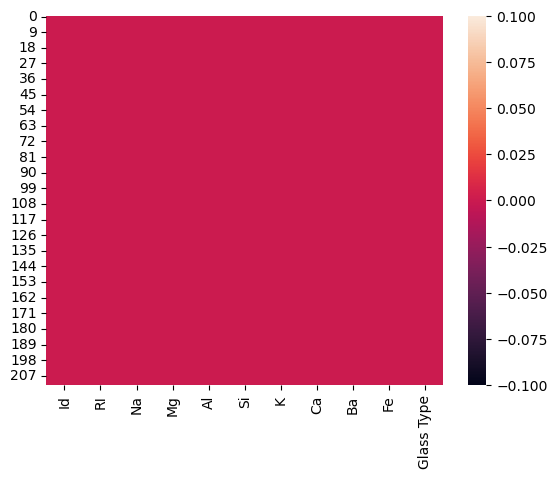

In [13]:
# checking the heatmap of null values
sns.heatmap(df.isnull())

In [14]:
# checking the unique values to confirm about the null values or blank space
for i in df.columns:
    print(df[i].unique())

[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213]
[1.52101 1.51761 1.51618 1.51766 1.51742 1.51596 1.51743 1.51756 1.51918
 1.51755 1.51571 1.51763 1.51589 1.51748 1.51784 1.52196 1.519

In [15]:
# now checking the stats of the data in detail
df.describe()

Id          RI          Na          Mg          Al          Si  \
count  213.000000  213.000000  213.000000  213.000000  213.000000  213.000000   
mean   107.000000    1.518371   13.403991    2.697136    1.441925   72.647606   
std     61.631972    0.003043    0.816568    1.433946    0.498532    0.774834   
min      1.000000    1.511150   10.730000    0.000000    0.290000   69.810000   
25%     54.000000    1.516520   12.900000    2.190000    1.190000   72.280000   
50%    107.000000    1.517680   13.300000    3.480000    1.360000   72.790000   
75%    160.000000    1.519160   13.810000    3.600000    1.630000   73.080000   
max    213.000000    1.533930   17.380000    4.490000    3.500000   75.410000   

                K          Ca          Ba          Fe  Glass Type  
count  213.000000  213.000000  213.000000  213.000000  213.000000  
mean     0.499390    8.958545    0.168028    0.057277    2.761033  
std      0.652832    1.426317    0.487649    0.097589    2.088204  
min      0.000000    5.430000    0.000000    0.000000    1.000000  
25%      0.130000    8.240000    0.000000    0.000000    1.000000  
50%      0.560000    8.600000    0.000000    0.000000    2.000000  
75%      0.610000    9.180000    0.000000    0.100000    3.000000  
max      6.210000   16.190000    3.150000    0.510000    7.000000

In [16]:
# checking the correlation 
df.corr()

Id        RI        Na        Mg        Al        Si  \
Id          1.000000 -0.069369  0.371034 -0.644998  0.485031  0.054292   
RI         -0.069369  1.000000 -0.190455 -0.126996 -0.406563 -0.541556   
Na          0.371034 -0.190455  1.000000 -0.267725  0.151695 -0.074482   
Mg         -0.644998 -0.126996 -0.267725  1.000000 -0.476345 -0.159512   
Al          0.485031 -0.406563  0.151695 -0.476345  1.000000 -0.011081   
Si          0.054292 -0.541556 -0.074482 -0.159512 -0.011081  1.000000   
K           0.009410 -0.291836 -0.263458 -0.001307  0.332255 -0.190678   
Ca          0.093387  0.810375 -0.275013 -0.449575 -0.259197 -0.208149   
Ba          0.439080  0.005600  0.319970 -0.480067  0.473336 -0.117904   
Fe         -0.068583  0.142041 -0.239334  0.078631 -0.071221 -0.091930   
Glass Type  0.875276 -0.161769  0.499475 -0.740315  0.594672  0.144339   

                   K        Ca        Ba        Fe  Glass Type  
Id          0.009410  0.093387  0.439080 -0.068583    0.875276  
RI         -0.291836  0.810375  0.005600  0.142041   -0.161769  
Na         -0.263458 -0.275013  0.319970 -0.239334    0.499475  
Mg         -0.001307 -0.449575 -0.480067  0.078631   -0.740315  
Al          0.332255 -0.259197  0.473336 -0.071221    0.594672  
Si         -0.190678 -0.208149 -0.117904 -0.091930    0.144339  
K           1.000000 -0.319167 -0.032555 -0.009844   -0.003028  
Ca         -0.319167  1.000000 -0.111909  0.124432    0.003191  
Ba         -0.032555 -0.111909  1.000000 -0.051546    0.564163  
Fe         -0.009844  0.124432 -0.051546  1.000000   -0.184817  
Glass Type -0.003028  0.003191  0.564163 -0.184817    1.000000

<Axes: >

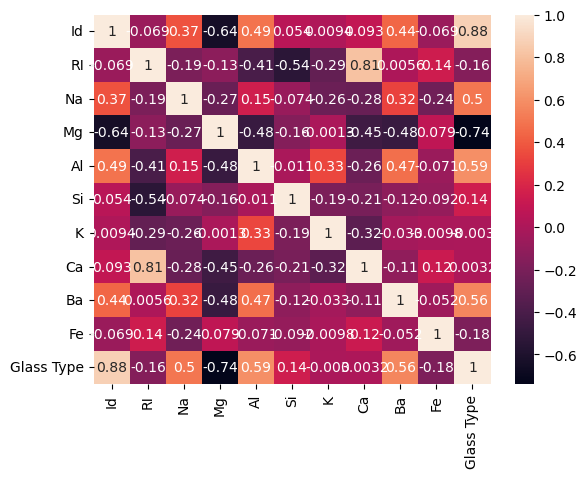

In [17]:
# comparing cols with each other using heatmap also checking the correlation 
sns.heatmap(df.corr(), annot = True)

In [18]:
# checking the skewness
df.skew()

Id            0.000000
RI            1.618113
Na            0.465859
Mg           -1.174044
Al            0.923929
Si           -0.723743
K             6.554772
Ca            2.039848
Ba            3.545183
Fe            1.747173
Glass Type    1.134642
dtype: float64

In [19]:
# taking cube root for reducing skewness
df['RI'] = np.cbrt(df['RI'])
df['Mg'] = np.cbrt(df['Mg'])
df['K'] = np.cbrt(df['K'])
df['Ca'] = np.cbrt(df['Ca'])
df['Ba'] = np.cbrt(df['Ba'])
df['Fe'] = np.cbrt(df['Fe'])

In [20]:
df['Al'] = np.cbrt(df['Al'])

In [21]:
# rechecking the skewness
df.skew()

Id            0.000000
RI            1.609742
Na            0.465859
Mg           -1.468269
Al           -0.197198
Si           -0.723743
K            -0.596998
Ca            1.401638
Ba            2.119744
Fe            0.887382
Glass Type    1.134642
dtype: float64

In [22]:
# dropping the 'Id' col since it won't be of use to our model
df.drop('Id', axis = 1, inplace = True)

# Visualization

## Univariate Analysis

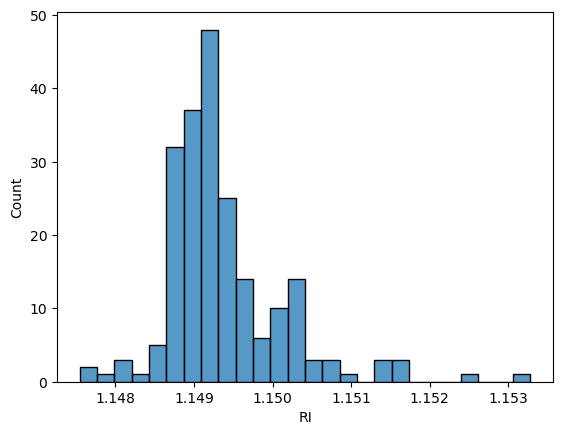

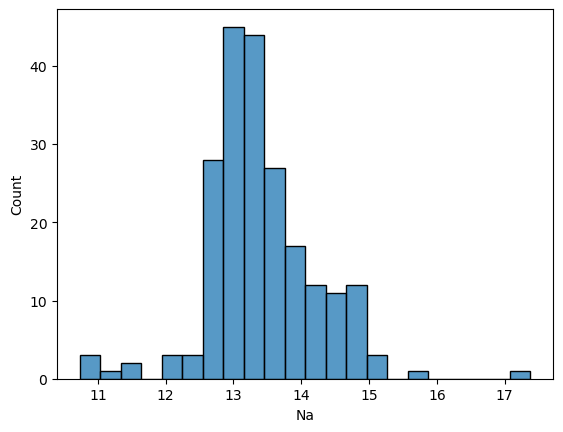

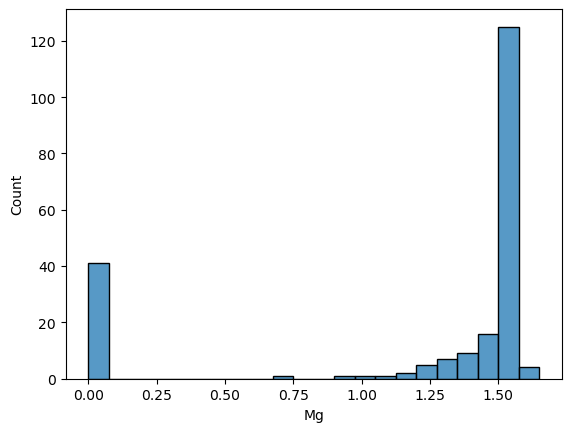

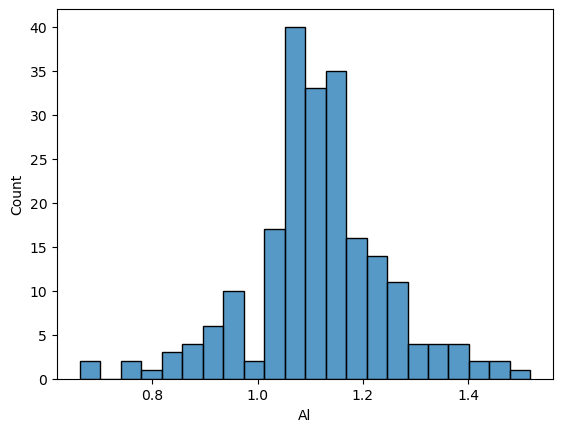

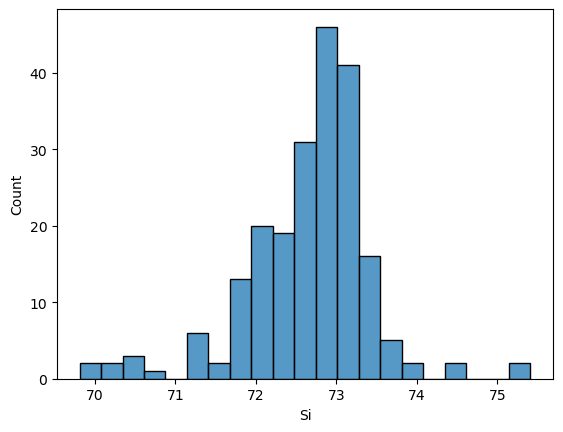

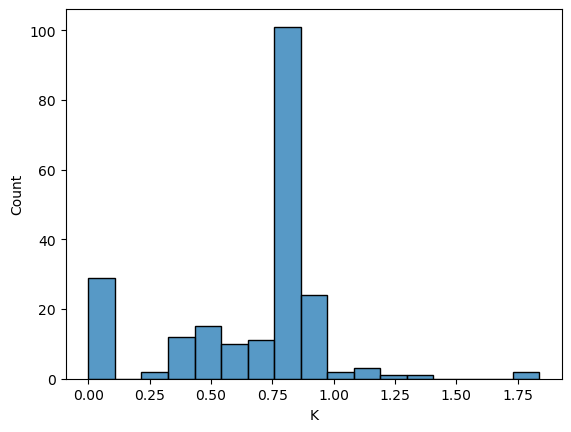

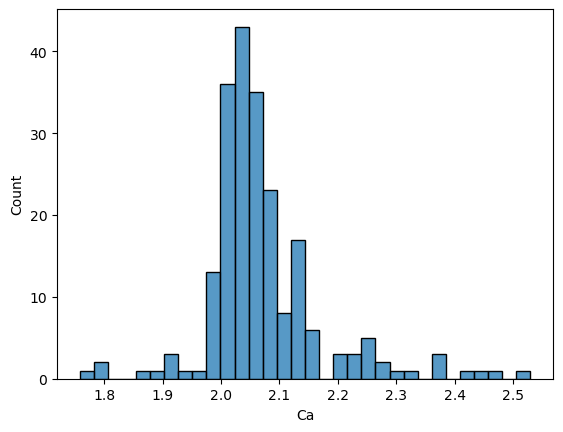

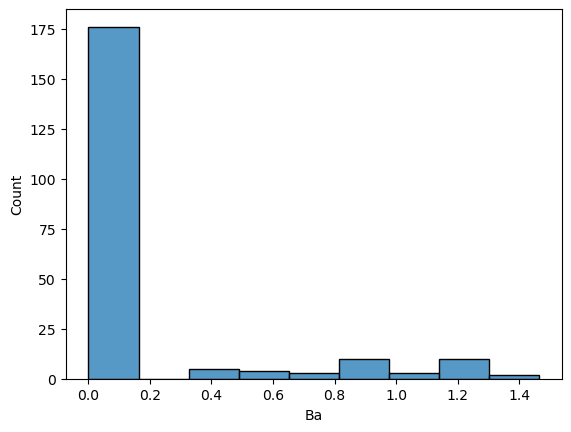

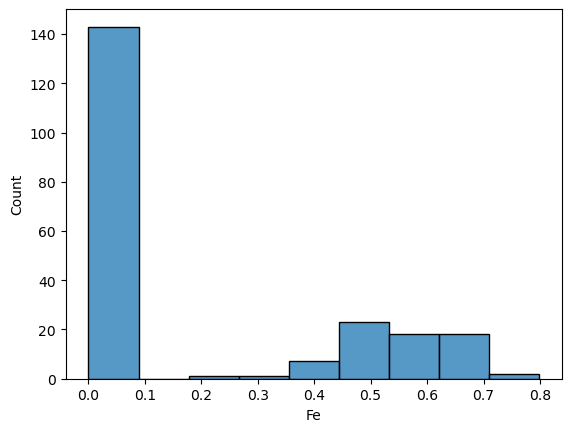

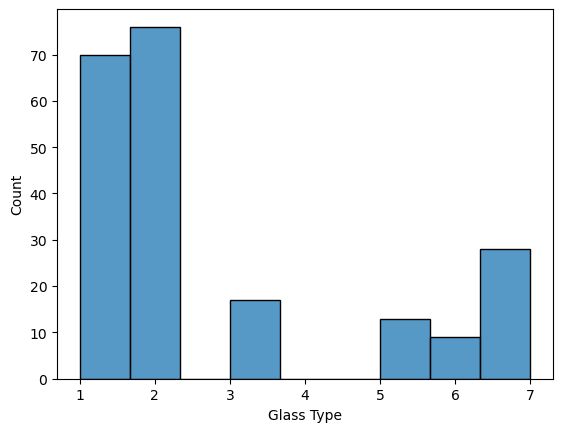

In [23]:
# let's check the distribution of all the cols using histogram
for i in df.columns:
    sns.histplot(df[i])
    plt.show()

## Bivariate Analysis

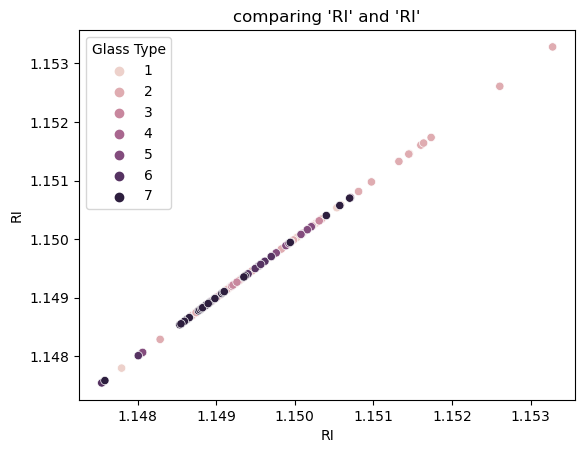

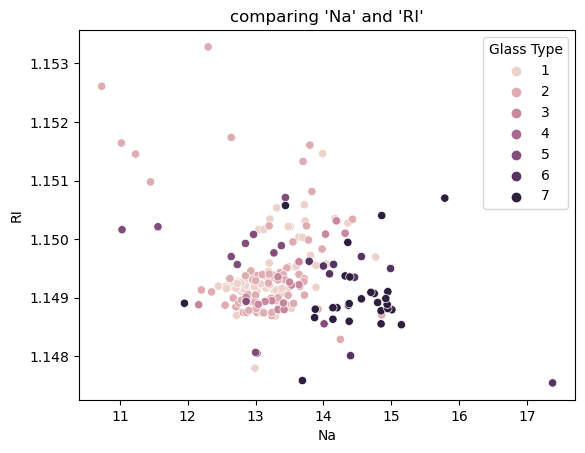

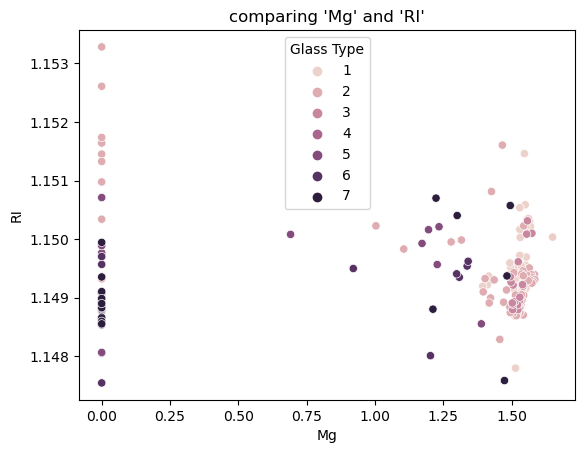

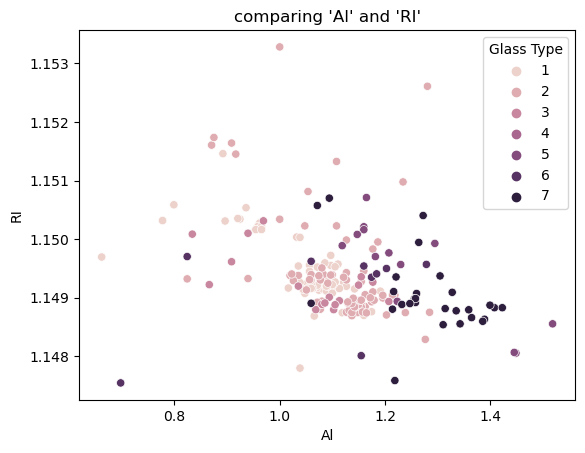

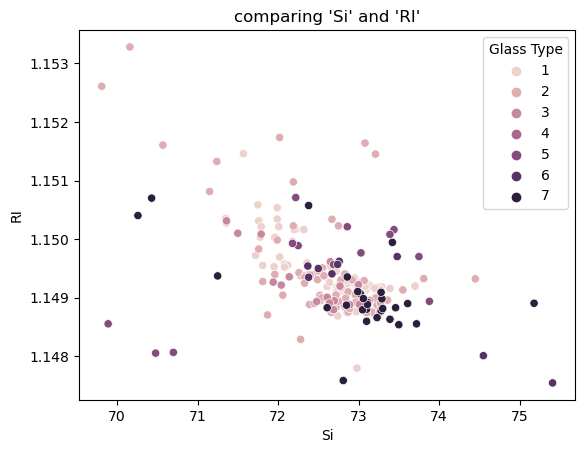

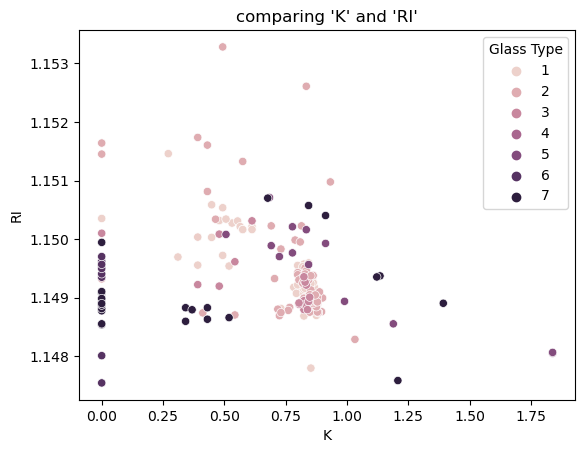

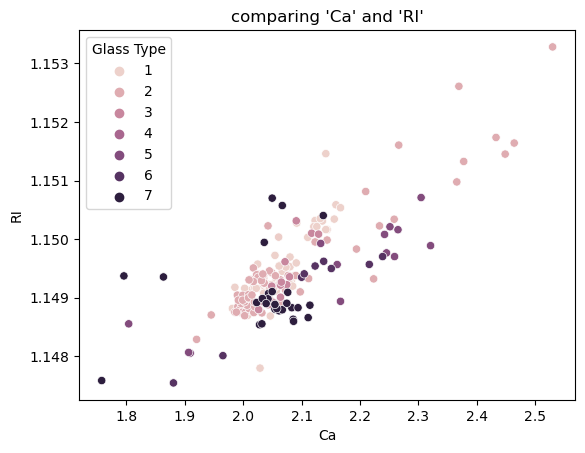

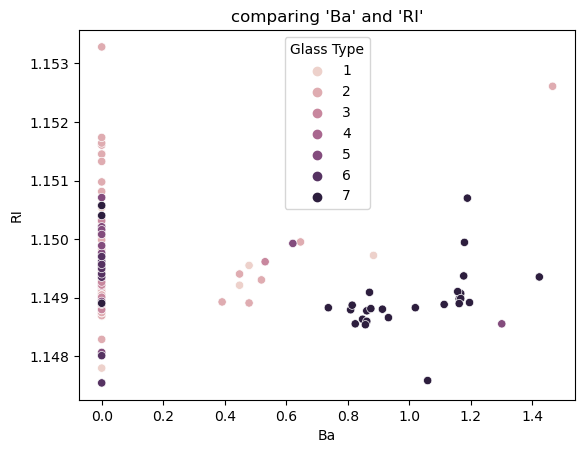

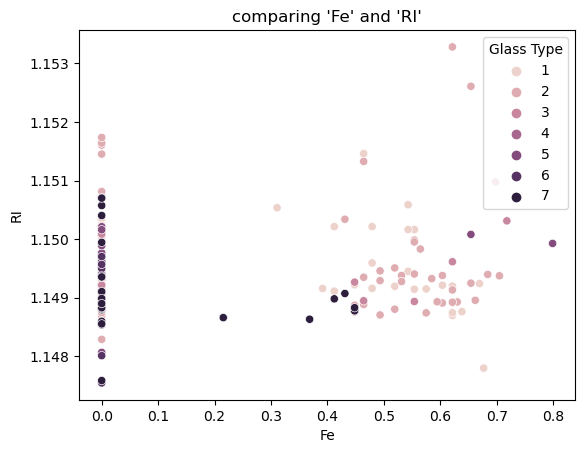

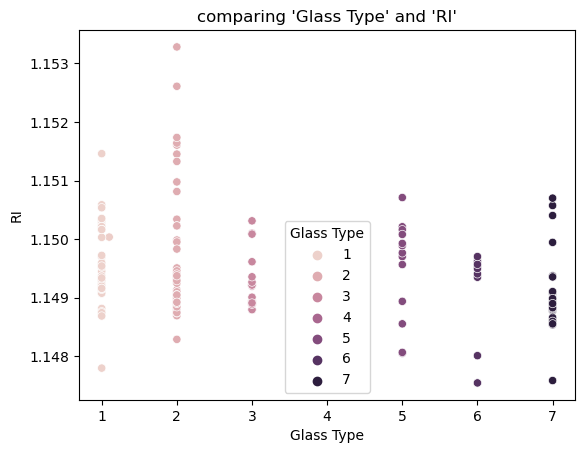

In [24]:
# comparing all cols and 'Ca' with respect to target col 'Glass Type'
for i in df.columns:
    plt.title(f"comparing '{i}' and 'RI'")
    sns.scatterplot(x = df[i], y = 'RI', hue = 'Glass Type', data = df)
    plt.show()

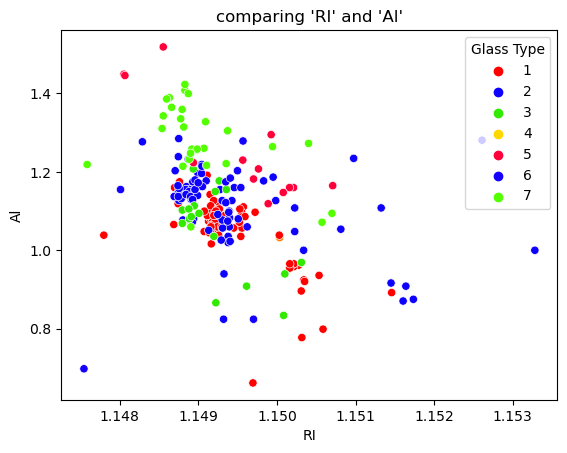

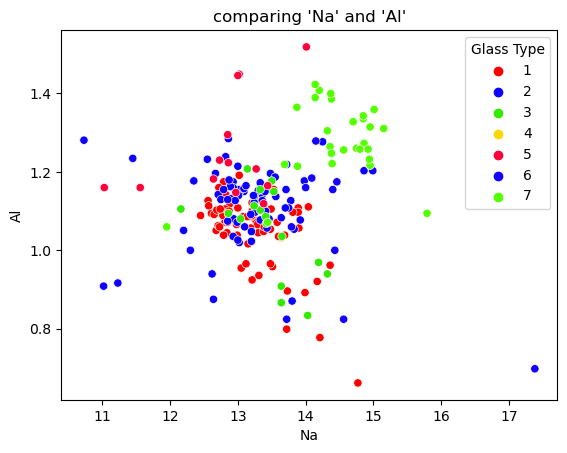

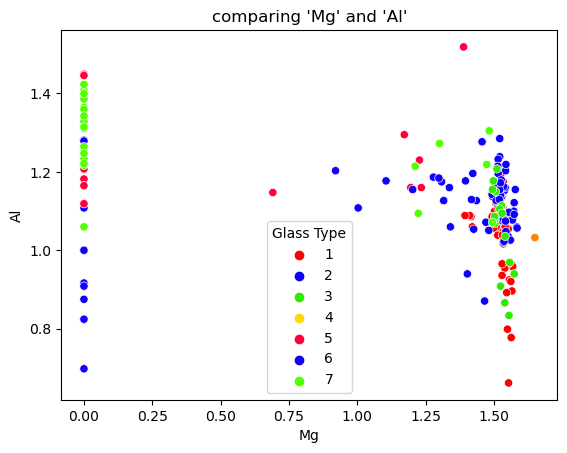

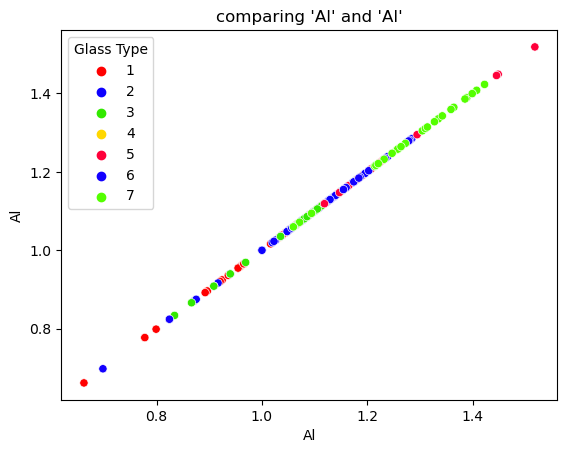

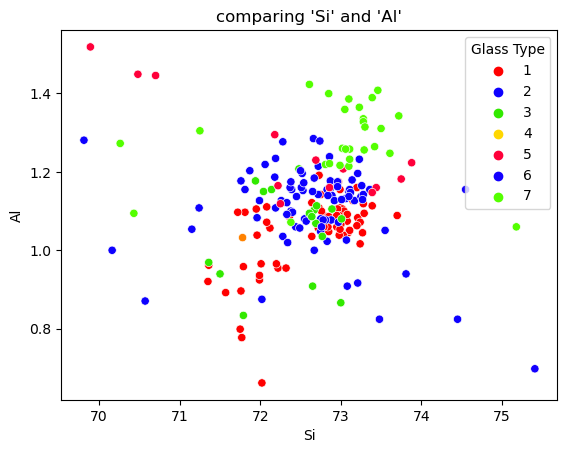

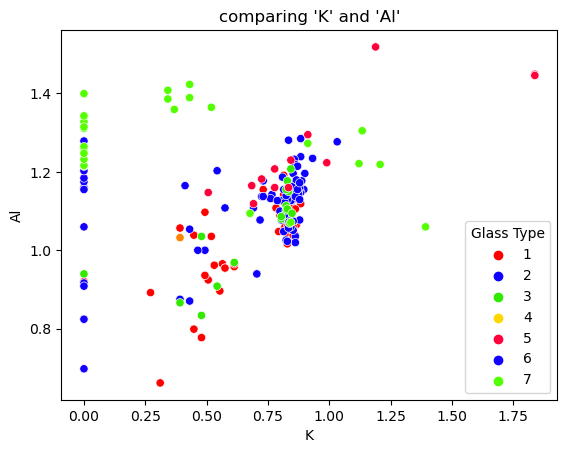

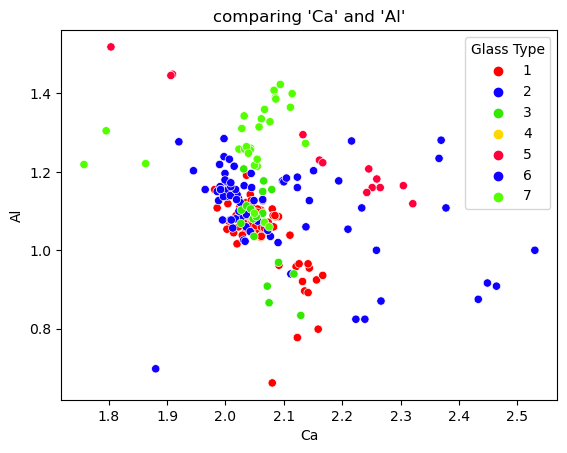

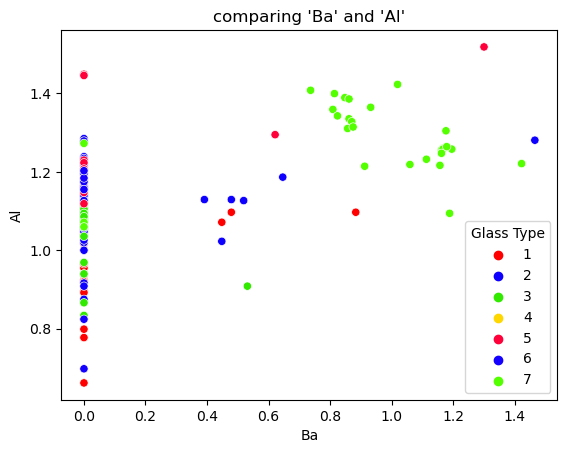

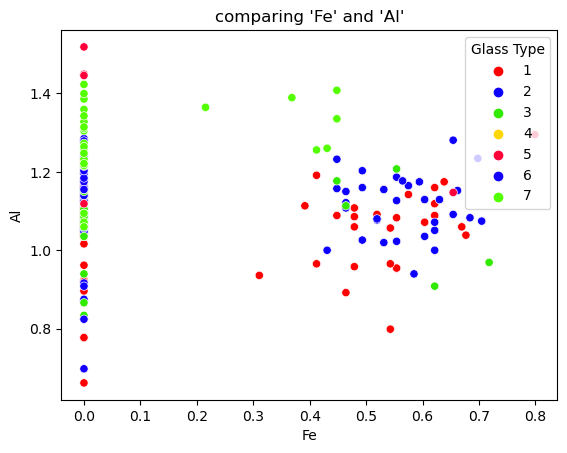

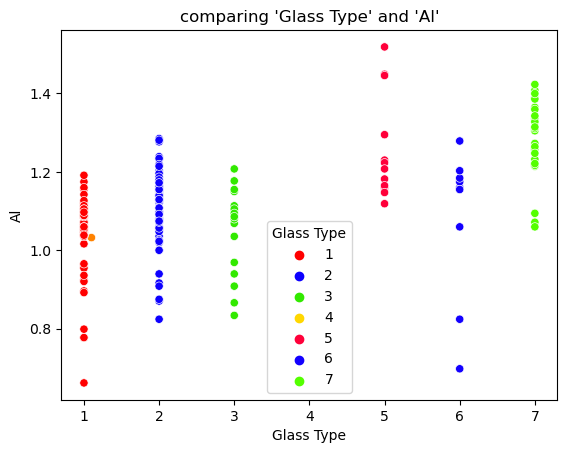

In [25]:
# comparing all cols and 'Al' with respect to target col 'Glass Type'
for i in df.columns:
    plt.title(f"comparing '{i}' and 'Al'")
    sns.scatterplot(x = df[i], y = 'Al', hue = 'Glass Type', data = df, palette = 'prism')
    plt.show()

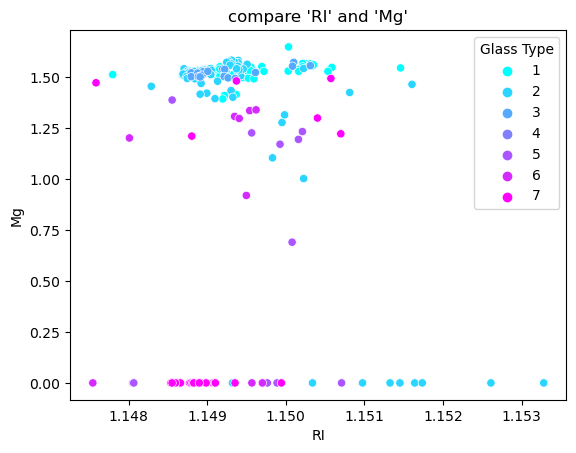

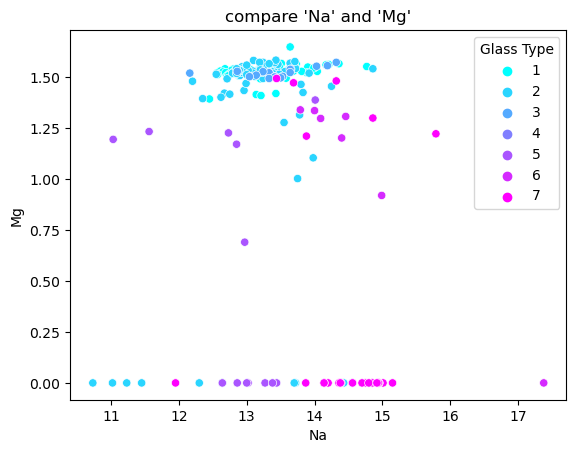

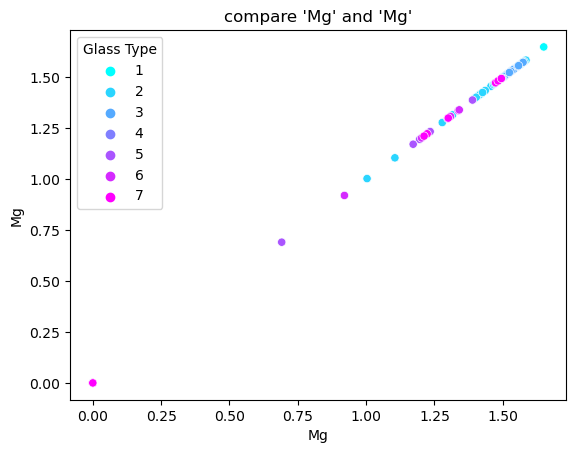

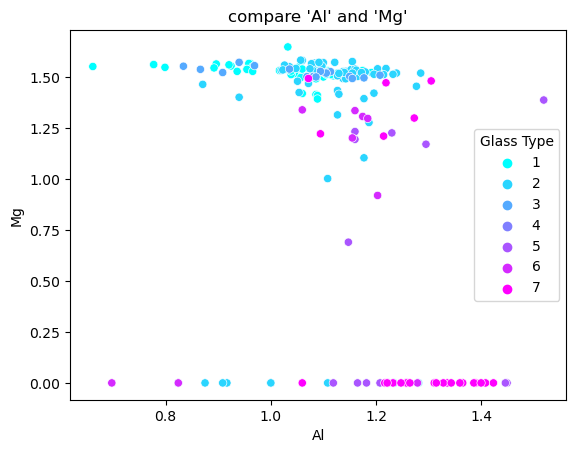

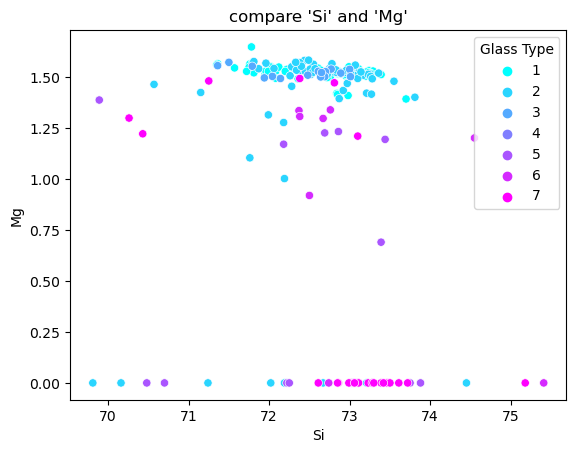

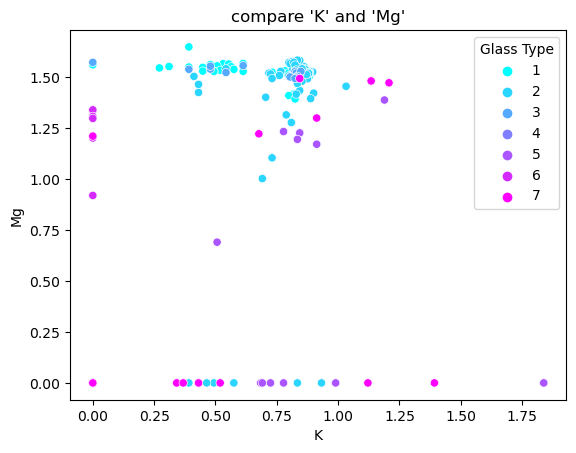

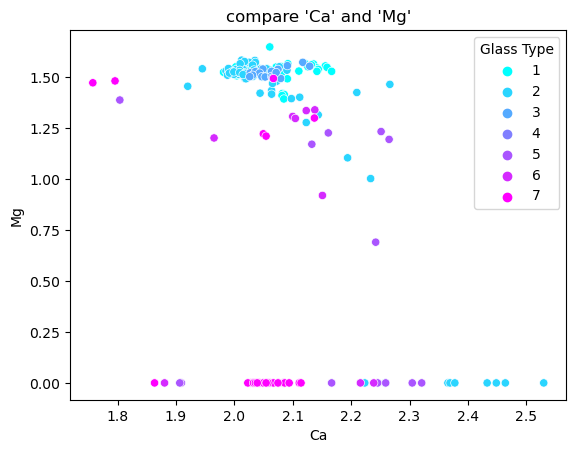

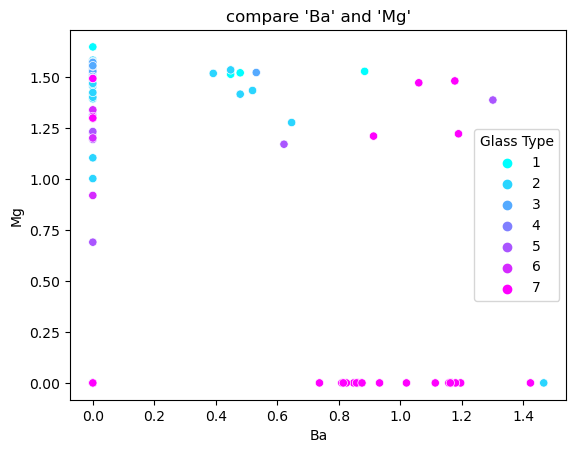

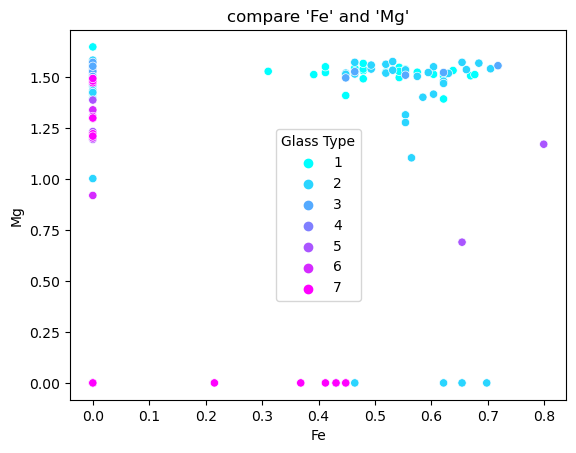

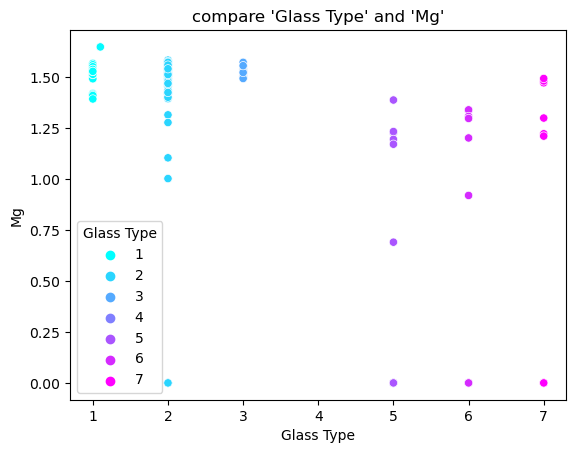

In [26]:
# comparing all cols and 'Mg' with respect to target col 'Glass Type'
for i in df.columns:
    plt.title(f"compare '{i}' and 'Mg'")
    sns.scatterplot(x = df[i], y = 'Mg', hue = 'Glass Type', data = df, palette = 'cool')
    plt.show()

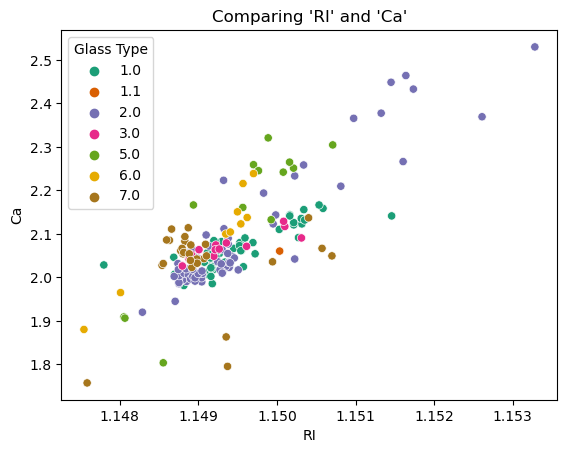

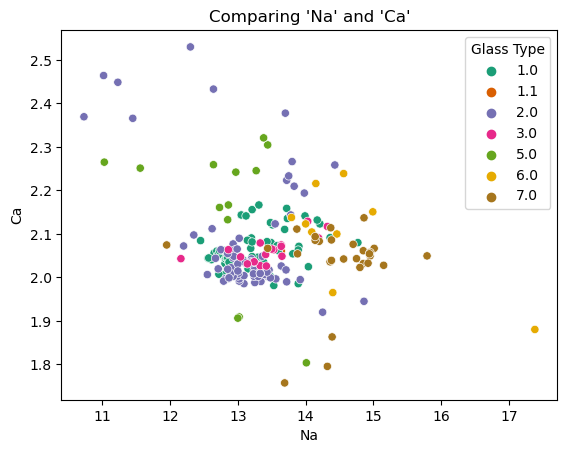

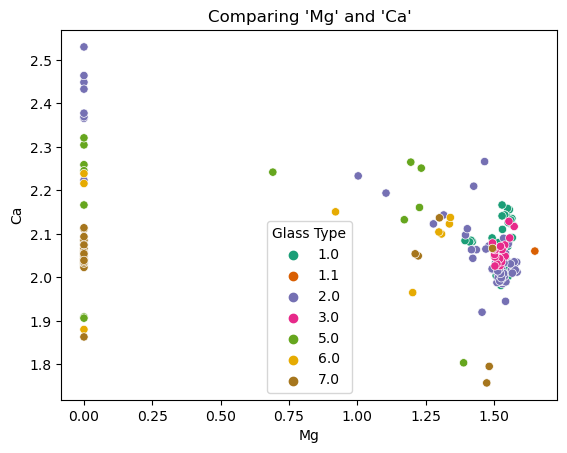

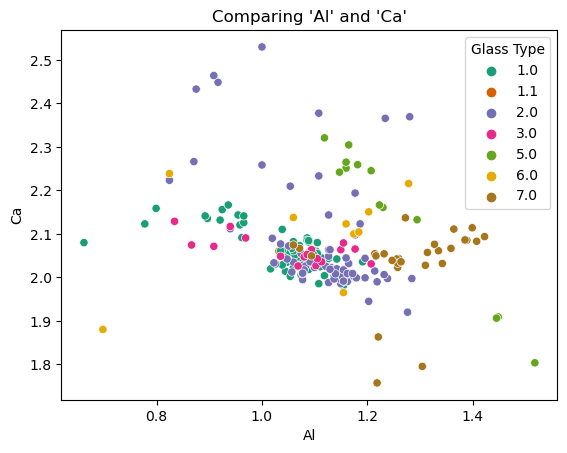

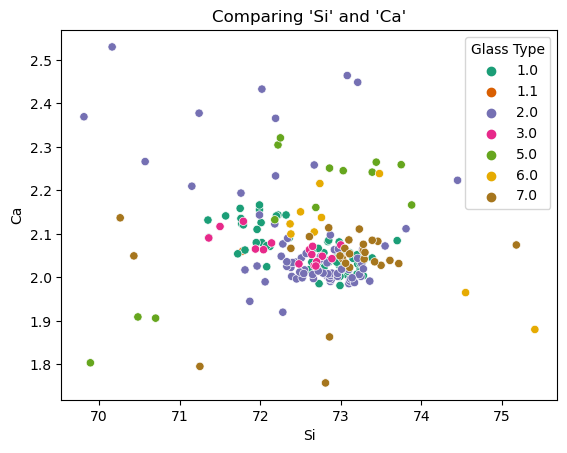

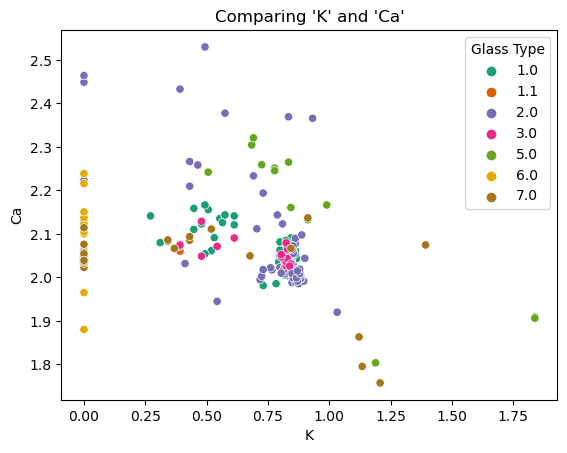

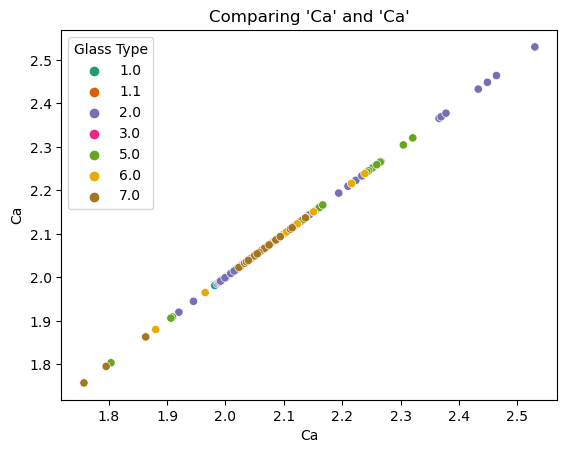

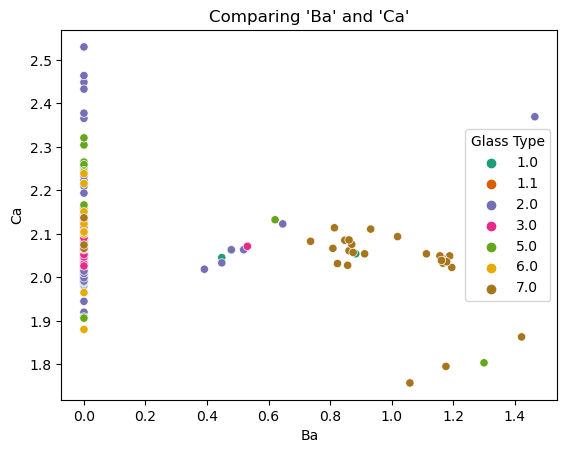

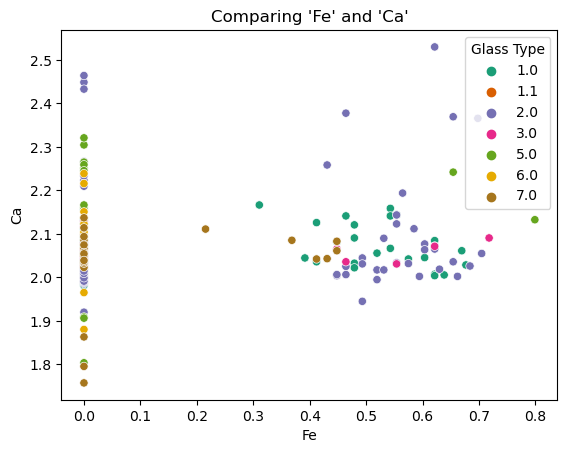

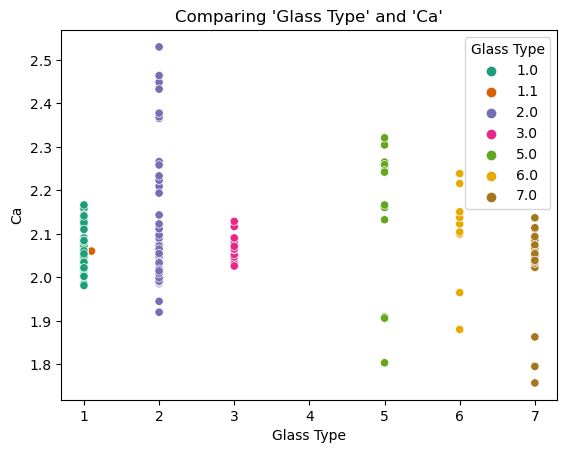

In [27]:
# comparing all cols and 'Ca'
for i in df.columns:
    plt.title(f"Comparing '{i}' and 'Ca'")
    sns.scatterplot(x = df[i], y = 'Ca', hue = 'Glass Type', data = df, palette = 'Dark2')
    plt.show()

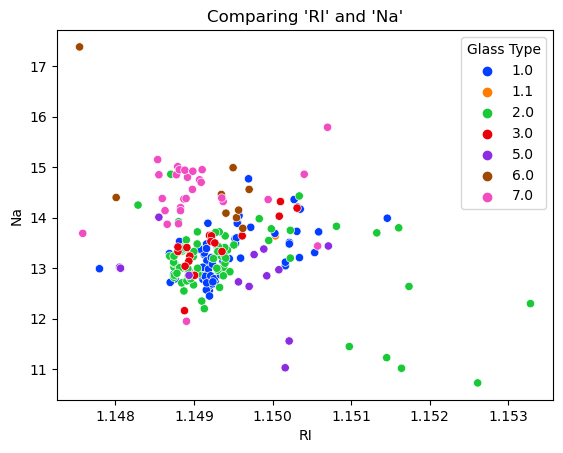

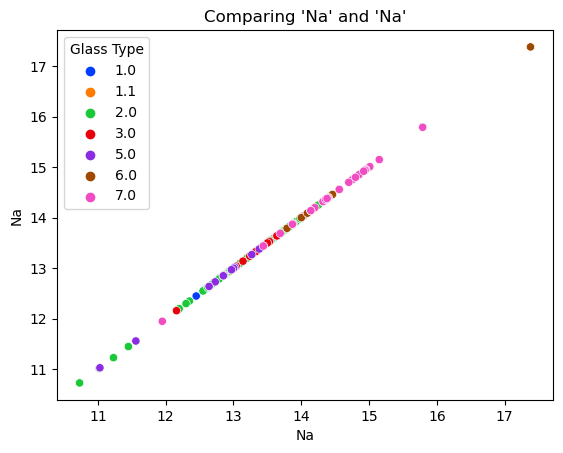

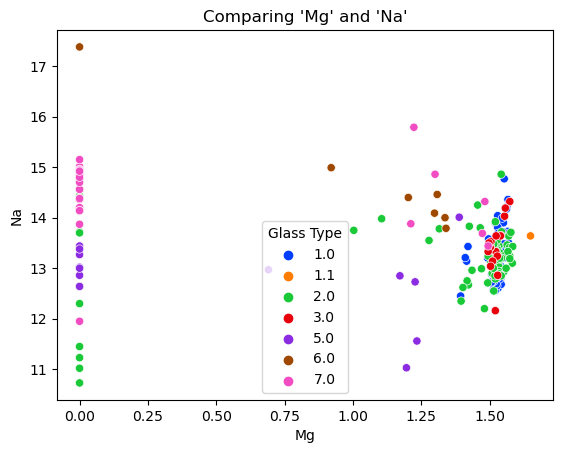

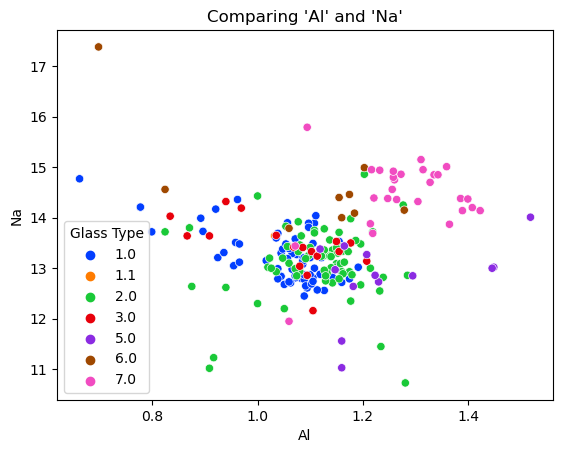

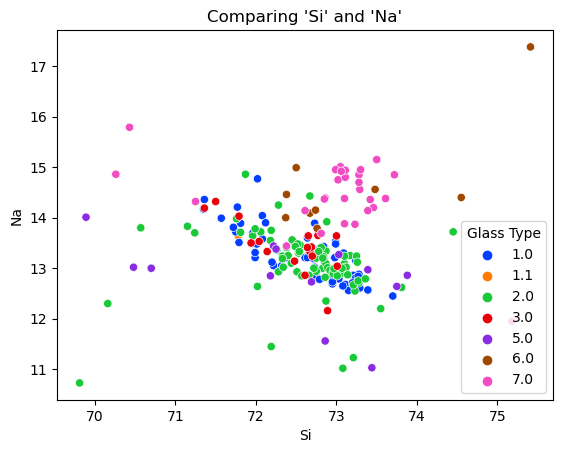

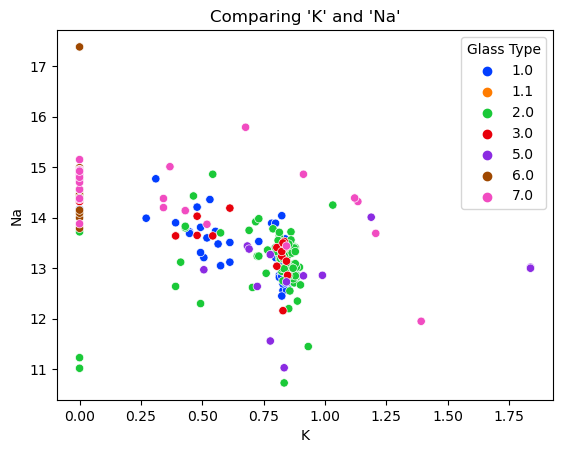

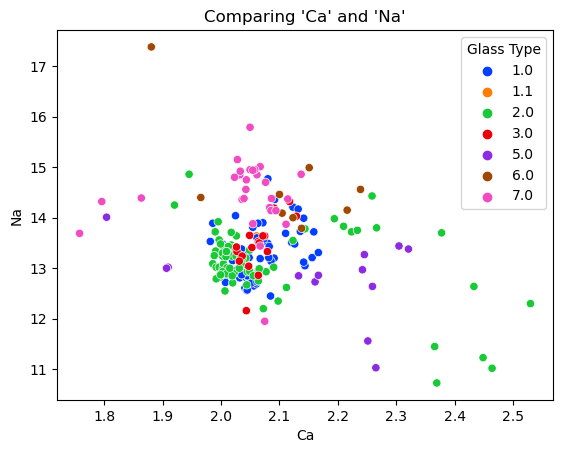

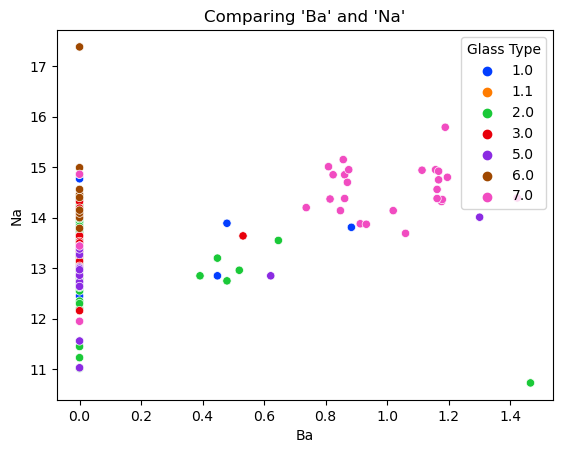

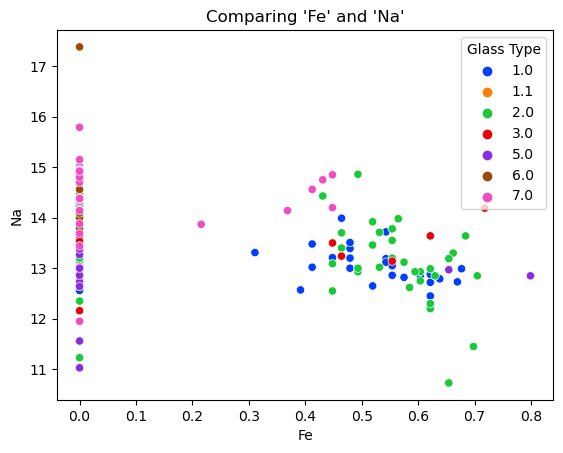

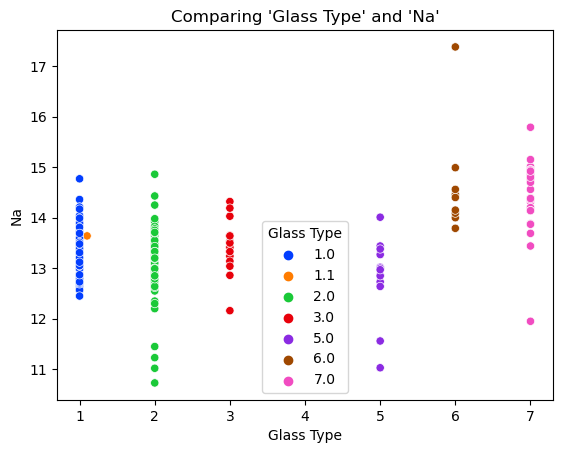

In [28]:
# comparing all the cols and 'Na'
for i in df.columns:
    plt.title(f"Comparing '{i}' and 'Na'")
    sns.scatterplot(x = df[i], y = 'Na', hue = 'Glass Type', data = df, palette = 'bright')
    plt.show()

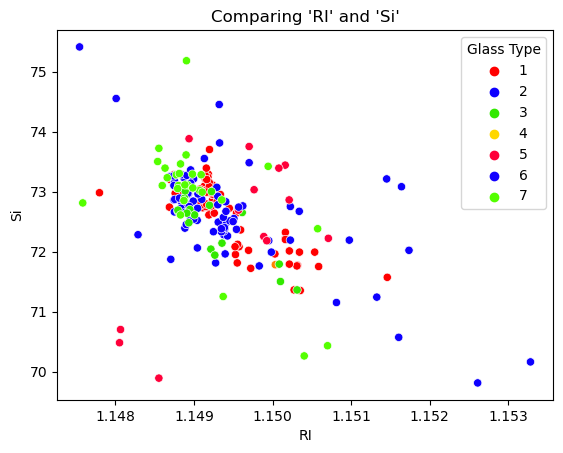

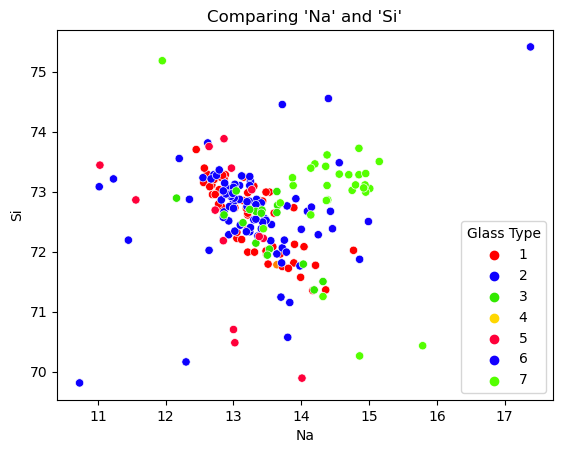

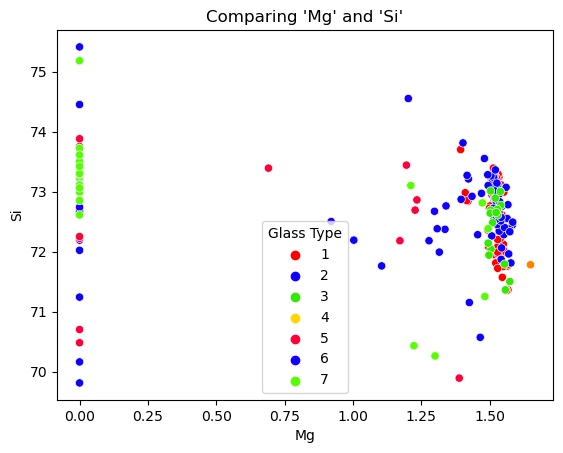

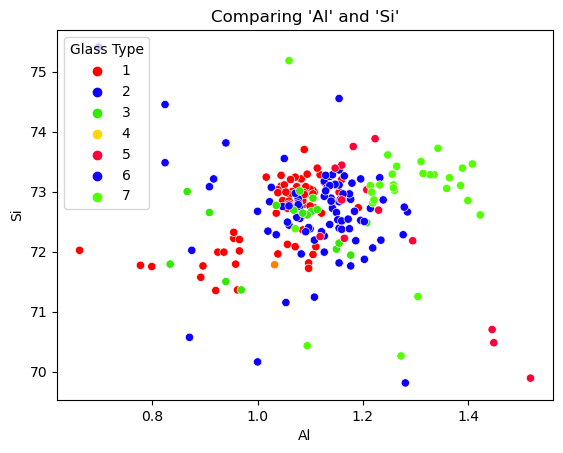

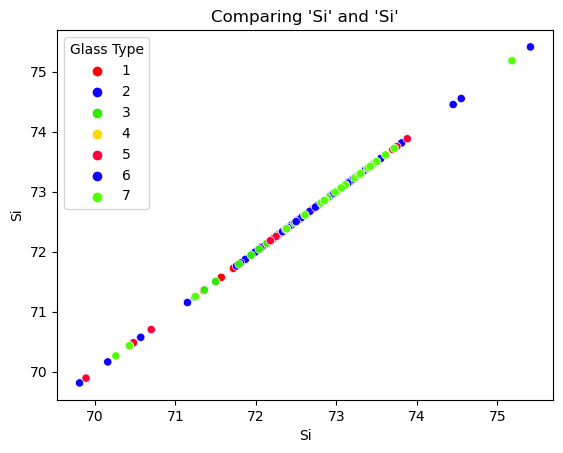

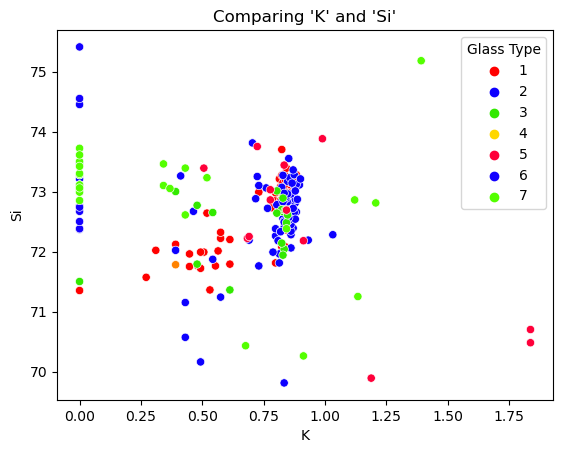

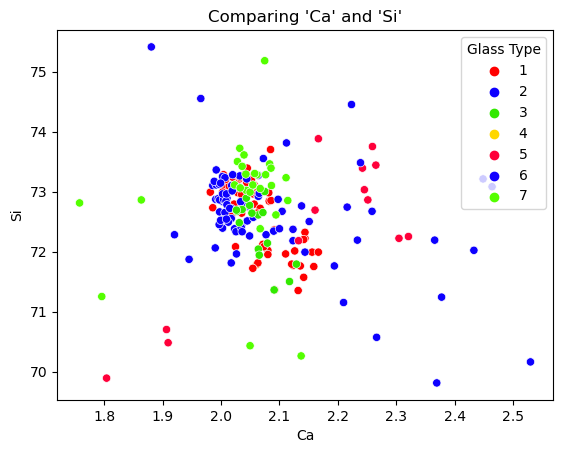

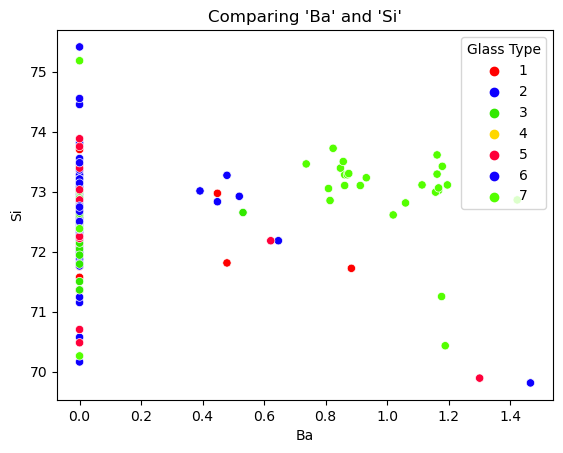

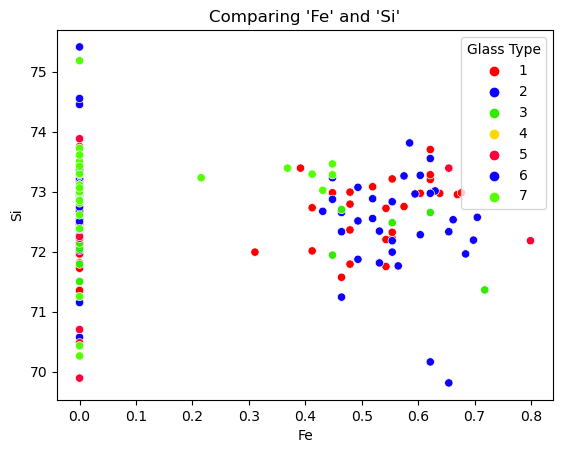

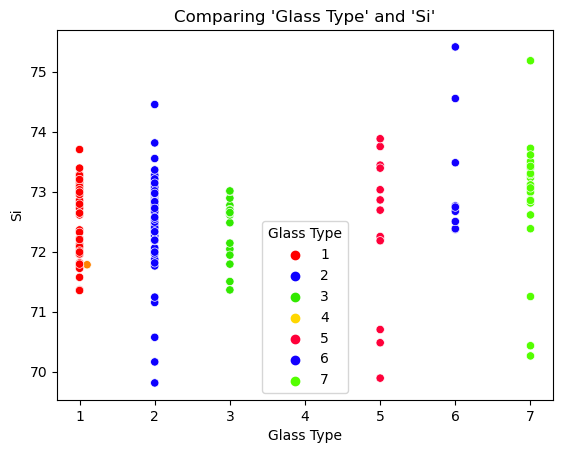

In [29]:
# comparing all cols and 'Si'
for i in df.columns:
    plt.title(f"Comparing '{i}' and 'Si'")
    sns.scatterplot(x = df[i], y = 'Si', data = df, hue = 'Glass Type', palette = 'prism')
    plt.show()

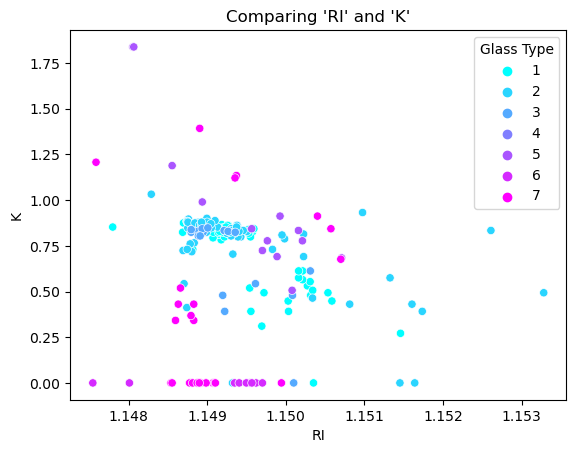

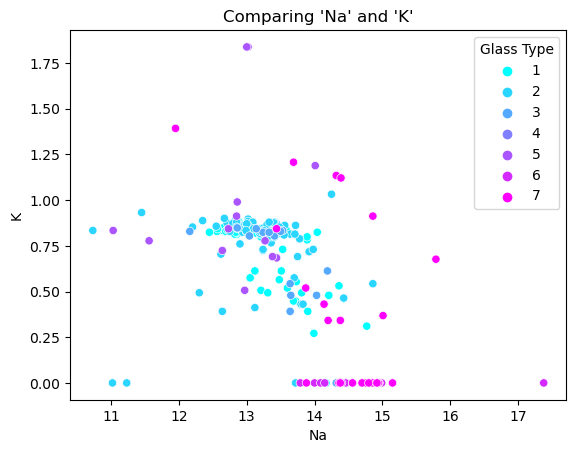

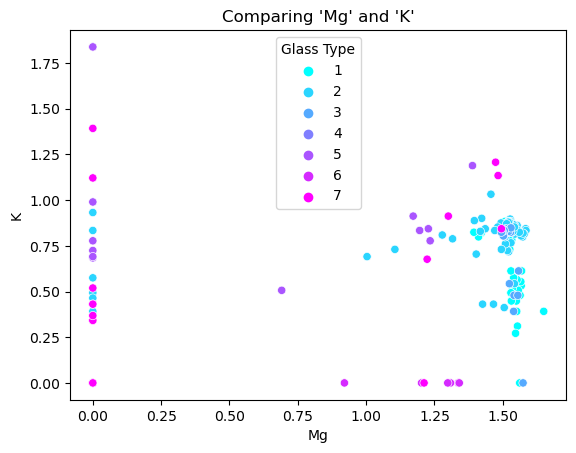

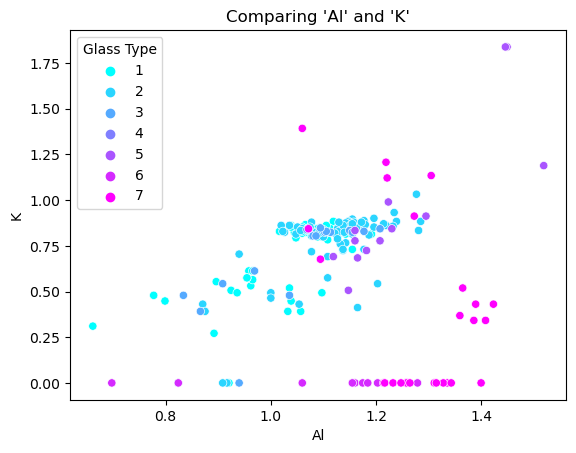

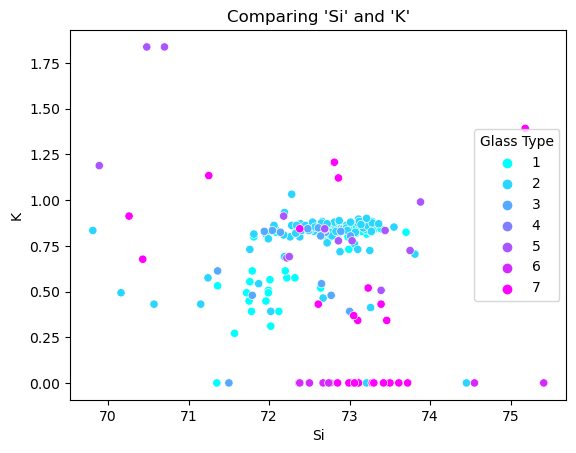

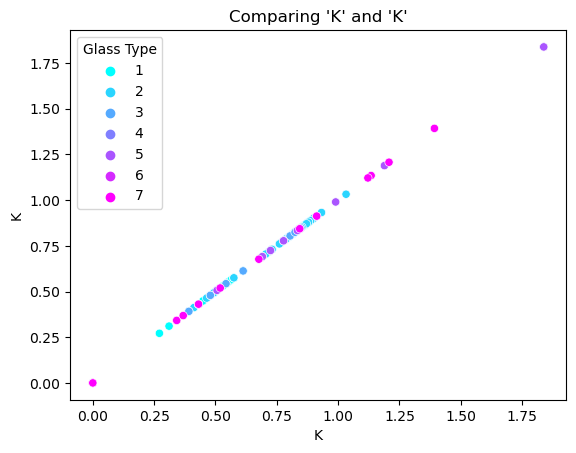

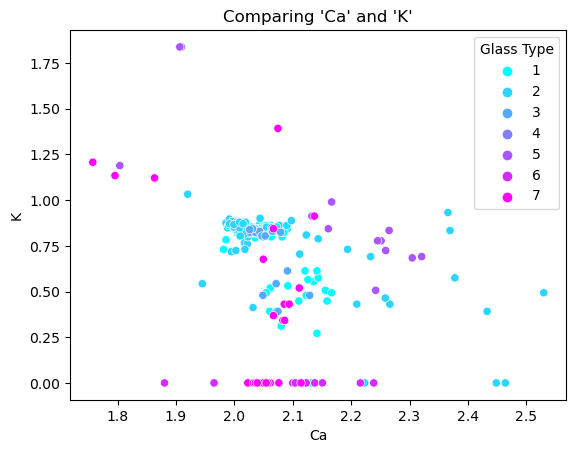

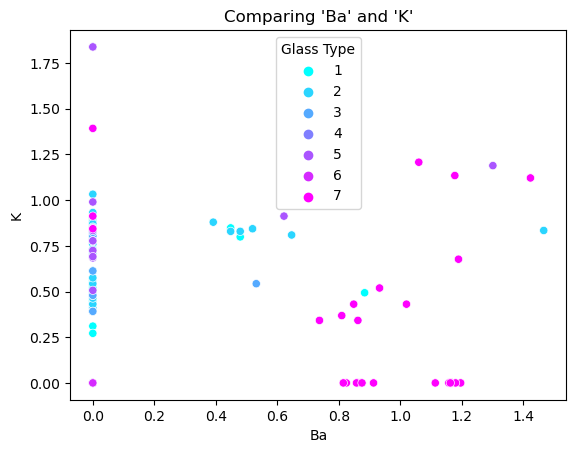

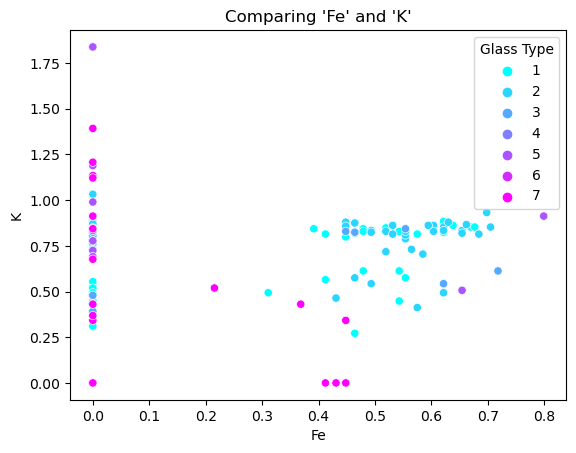

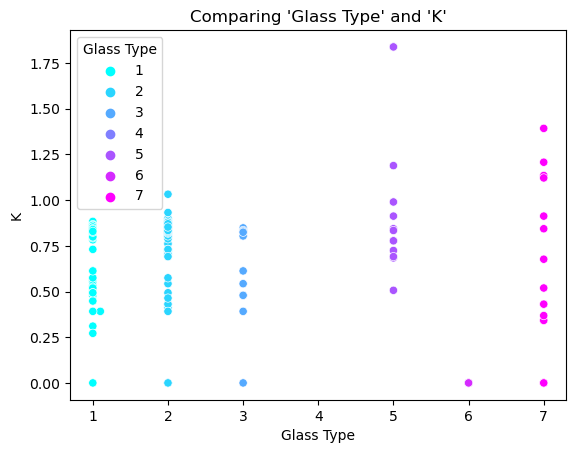

In [30]:
# comparing all columns and 'K'
for i in df.columns:
    plt.title(f"Comparing '{i}' and 'K'")
    sns.scatterplot(x = df[i], y = 'K', hue = 'Glass Type', data = df, palette = 'cool')
    plt.show()

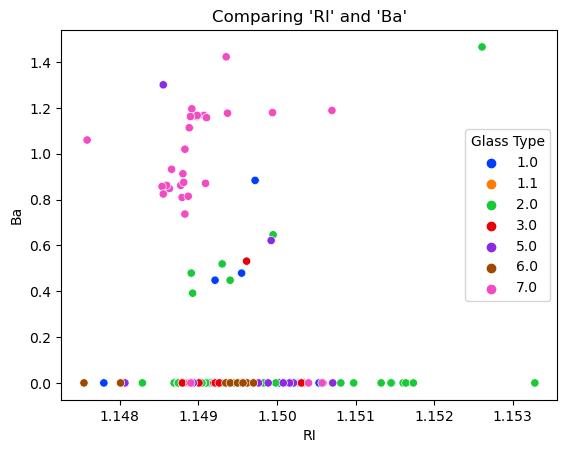

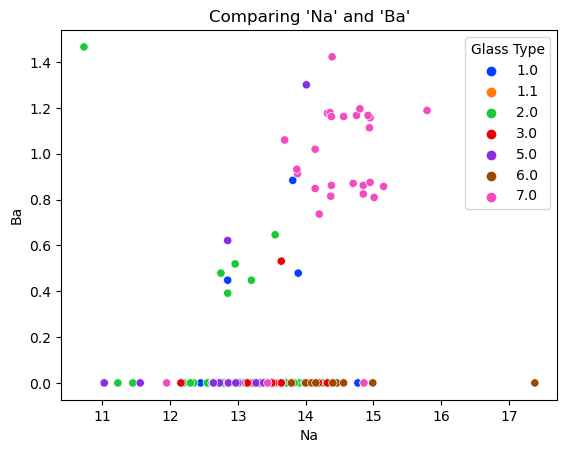

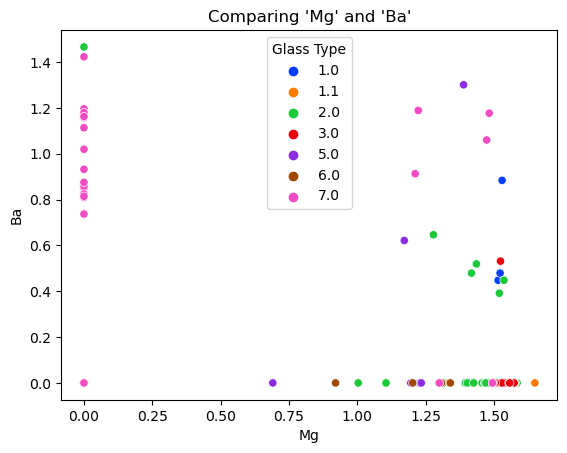

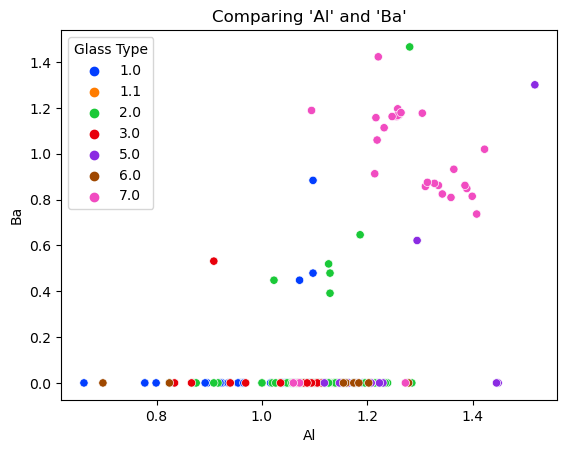

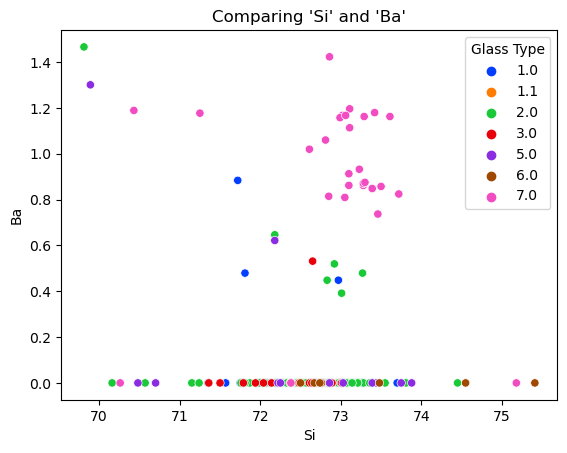

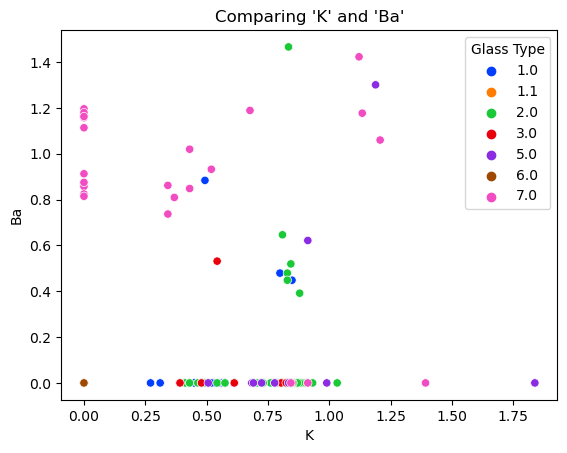

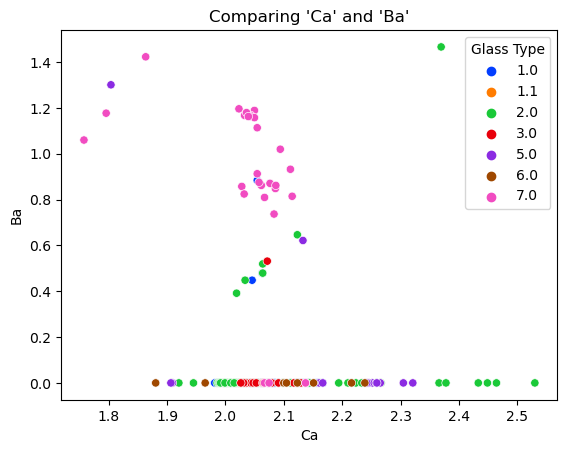

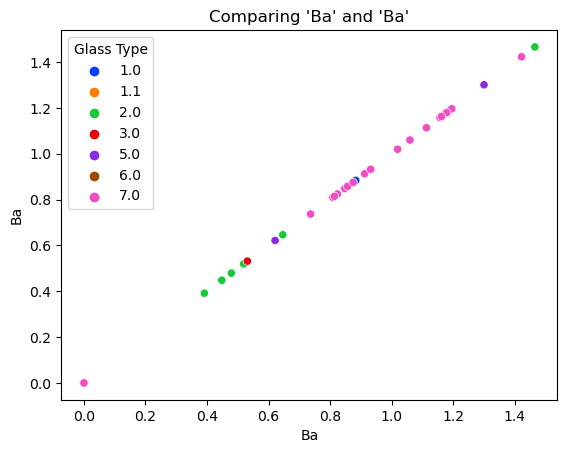

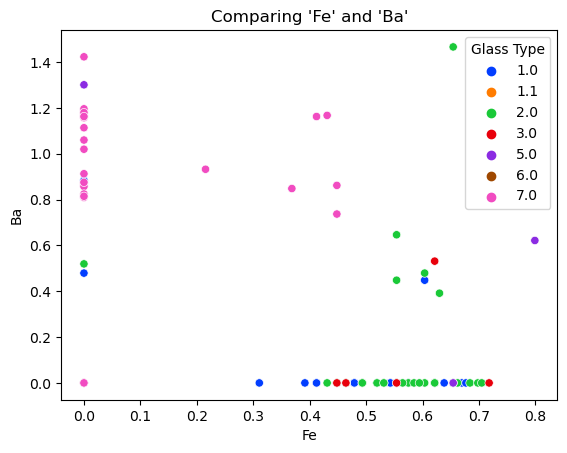

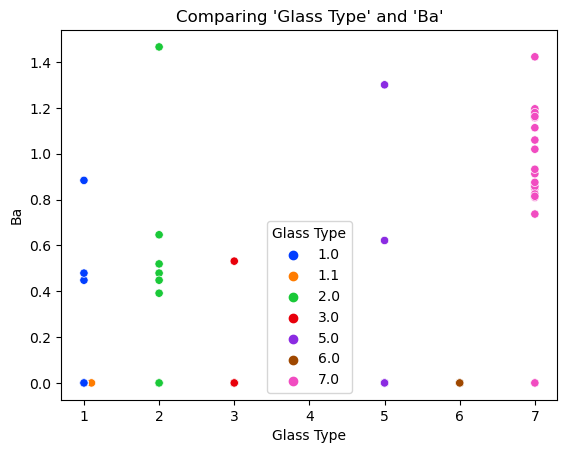

In [31]:
# comparing all cols and 'Ba'
for i in df.columns:
    plt.title(f"Comparing '{i}' and 'Ba'")
    sns.scatterplot(x = df[i], y = 'Ba', hue = 'Glass Type', data = df, palette = 'bright')
    plt.show()
    

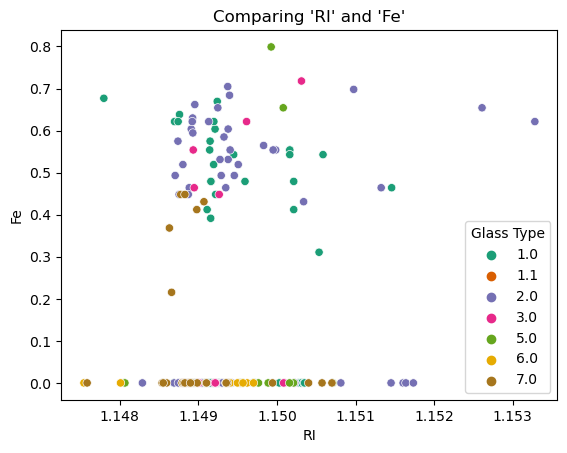

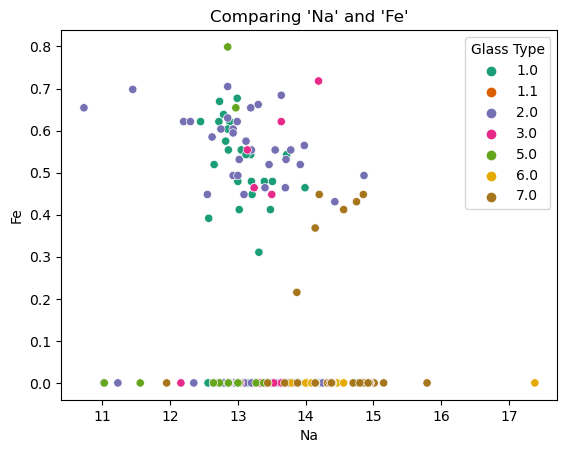

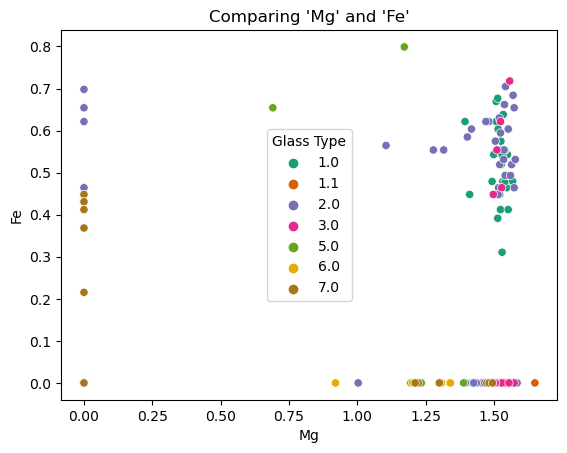

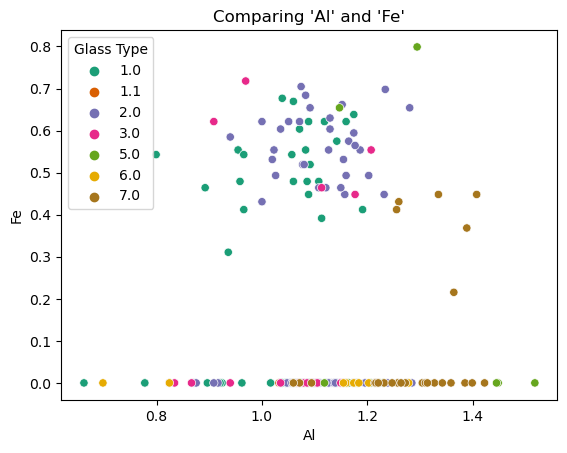

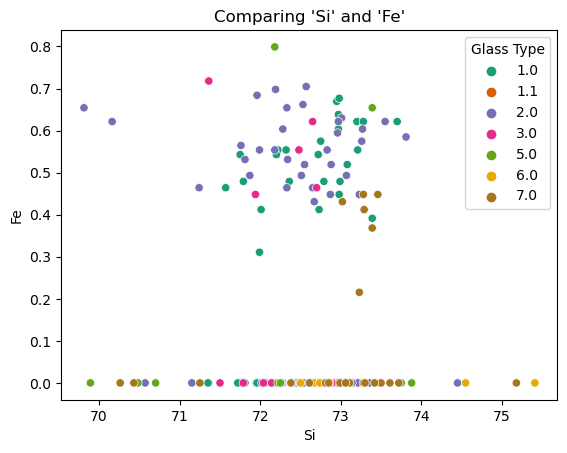

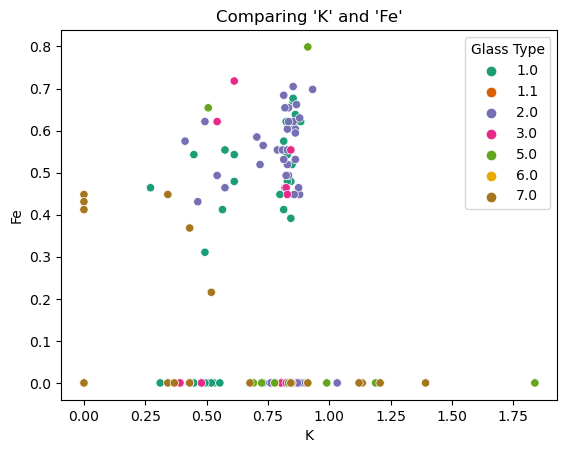

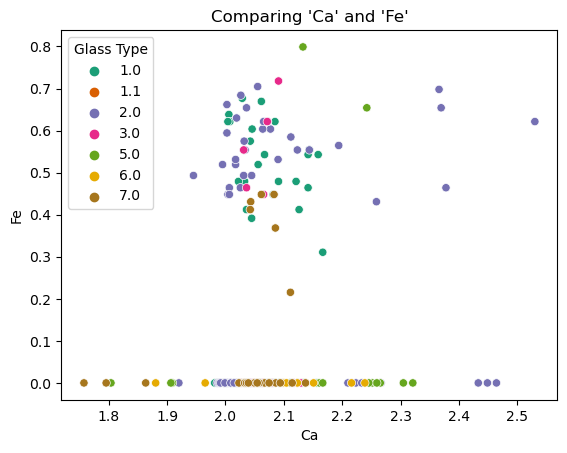

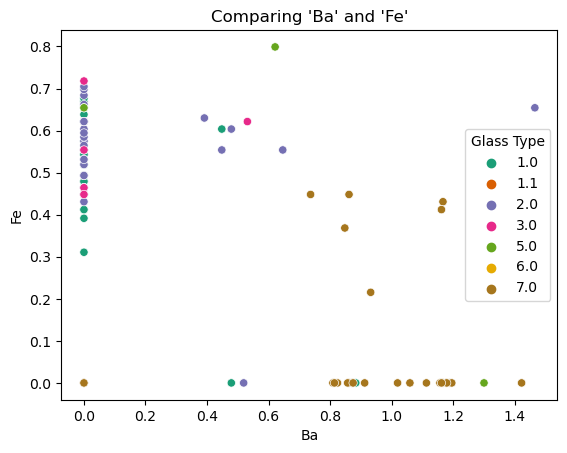

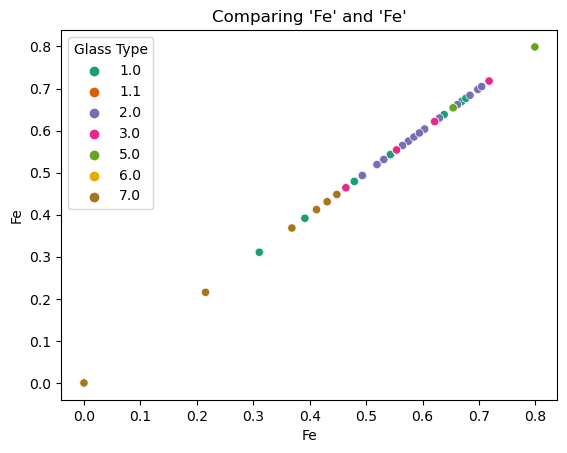

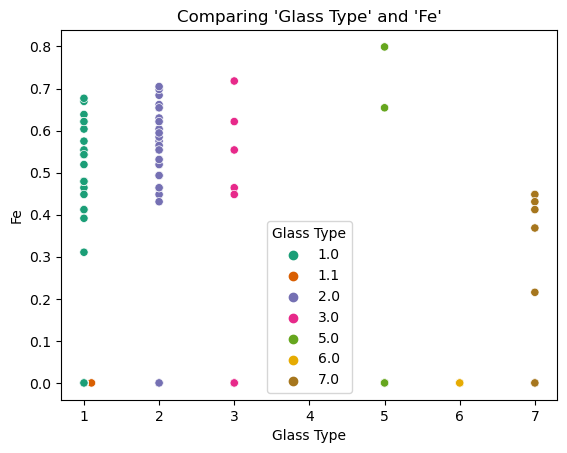

In [32]:
# comparing all cols and 'Fe'
for i in df.columns:
    plt.title(f"Comparing '{i}' and 'Fe'")
    sns.scatterplot(x = df[i], y = 'Fe', hue = 'Glass Type', data = df, palette = 'Dark2')
    plt.show()

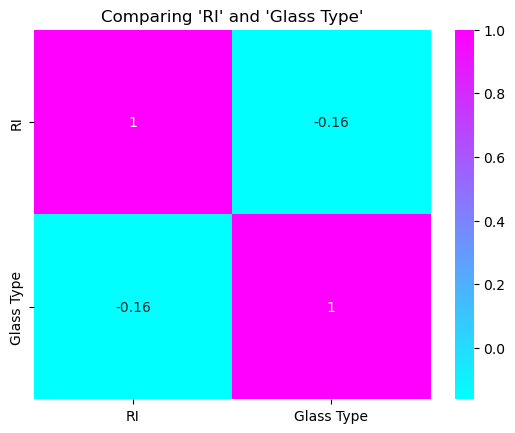

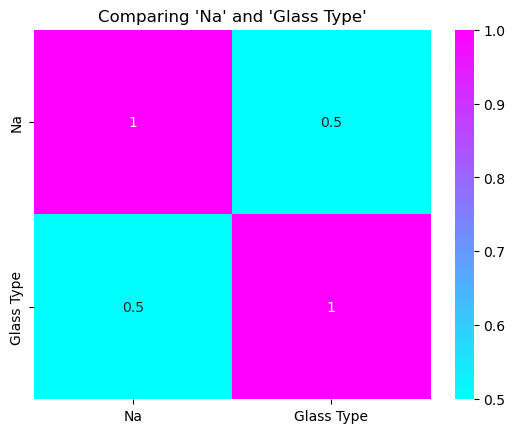

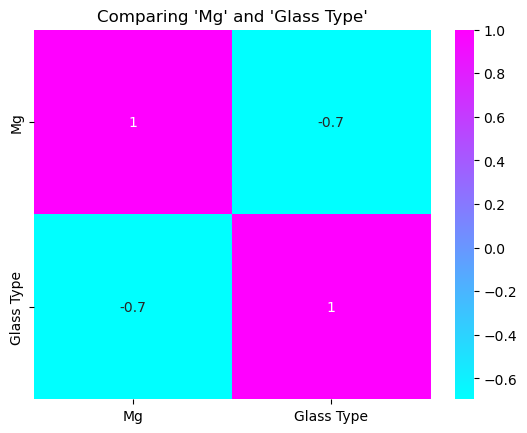

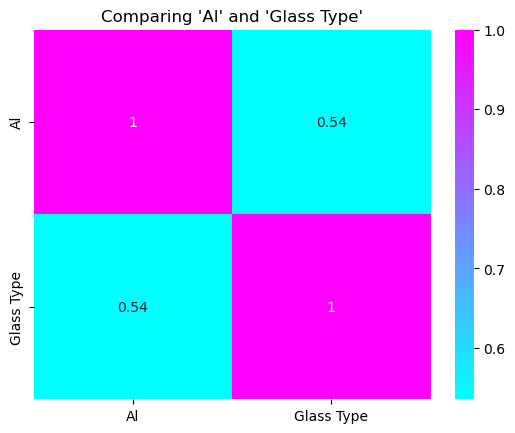

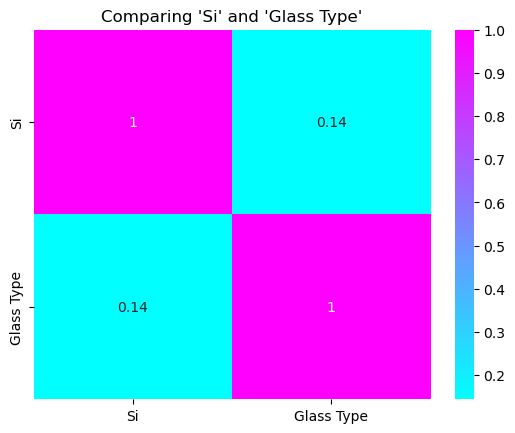

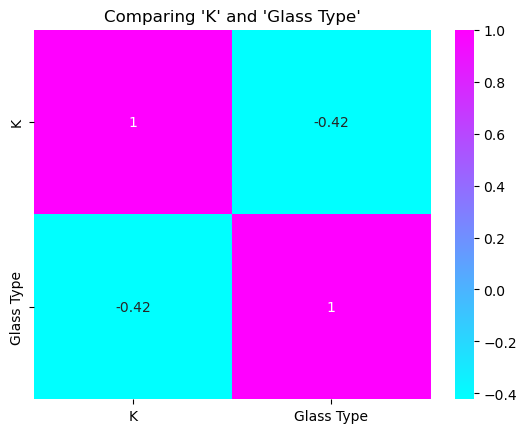

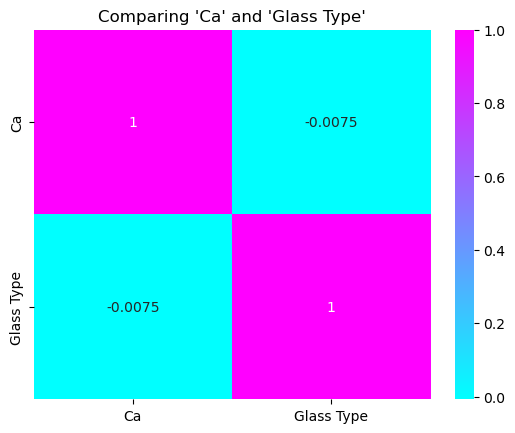

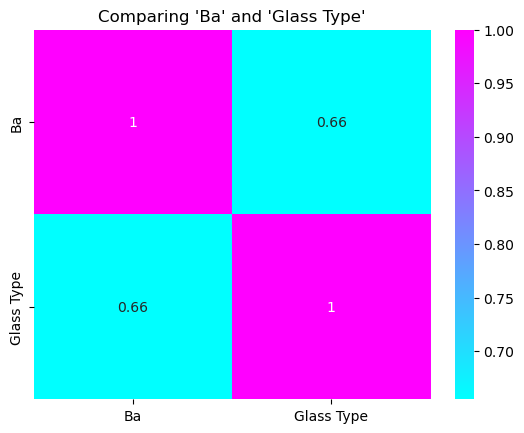

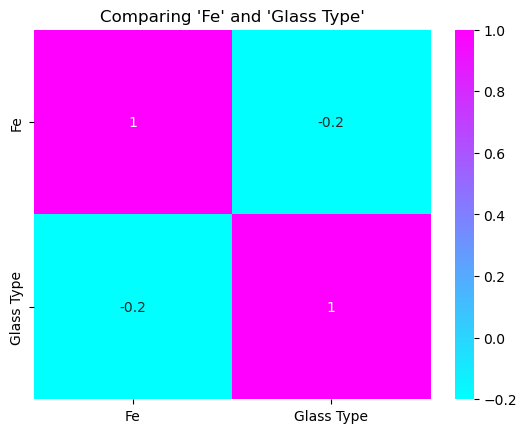

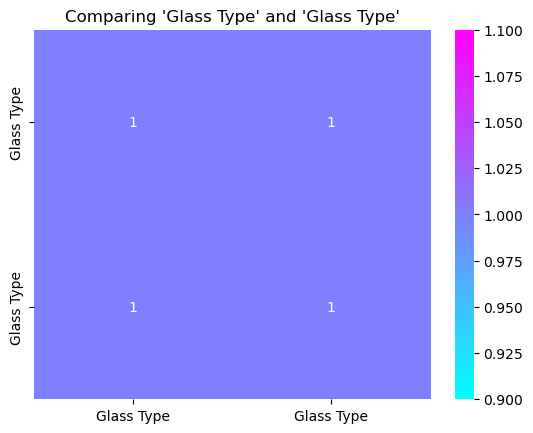

In [33]:
# comparing the target col ie 'Glass Type' with other cols
for i in df.columns:
    plt.title(f"Comparing '{i}' and 'Glass Type'")
    sns.heatmap(df[[i, 'Glass Type']].corr(), annot = True, cmap = 'cool')
    plt.show()

## Multivariate Analysis

<Axes: >

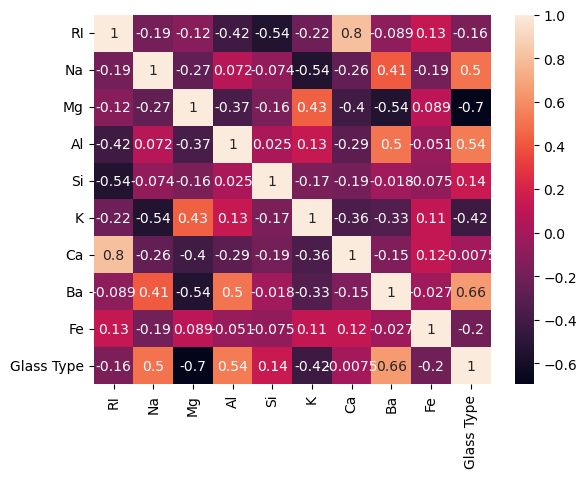

In [34]:
# comparing cols with each other using heatmap also checking the correlation 
sns.heatmap(df.corr(), annot = True)

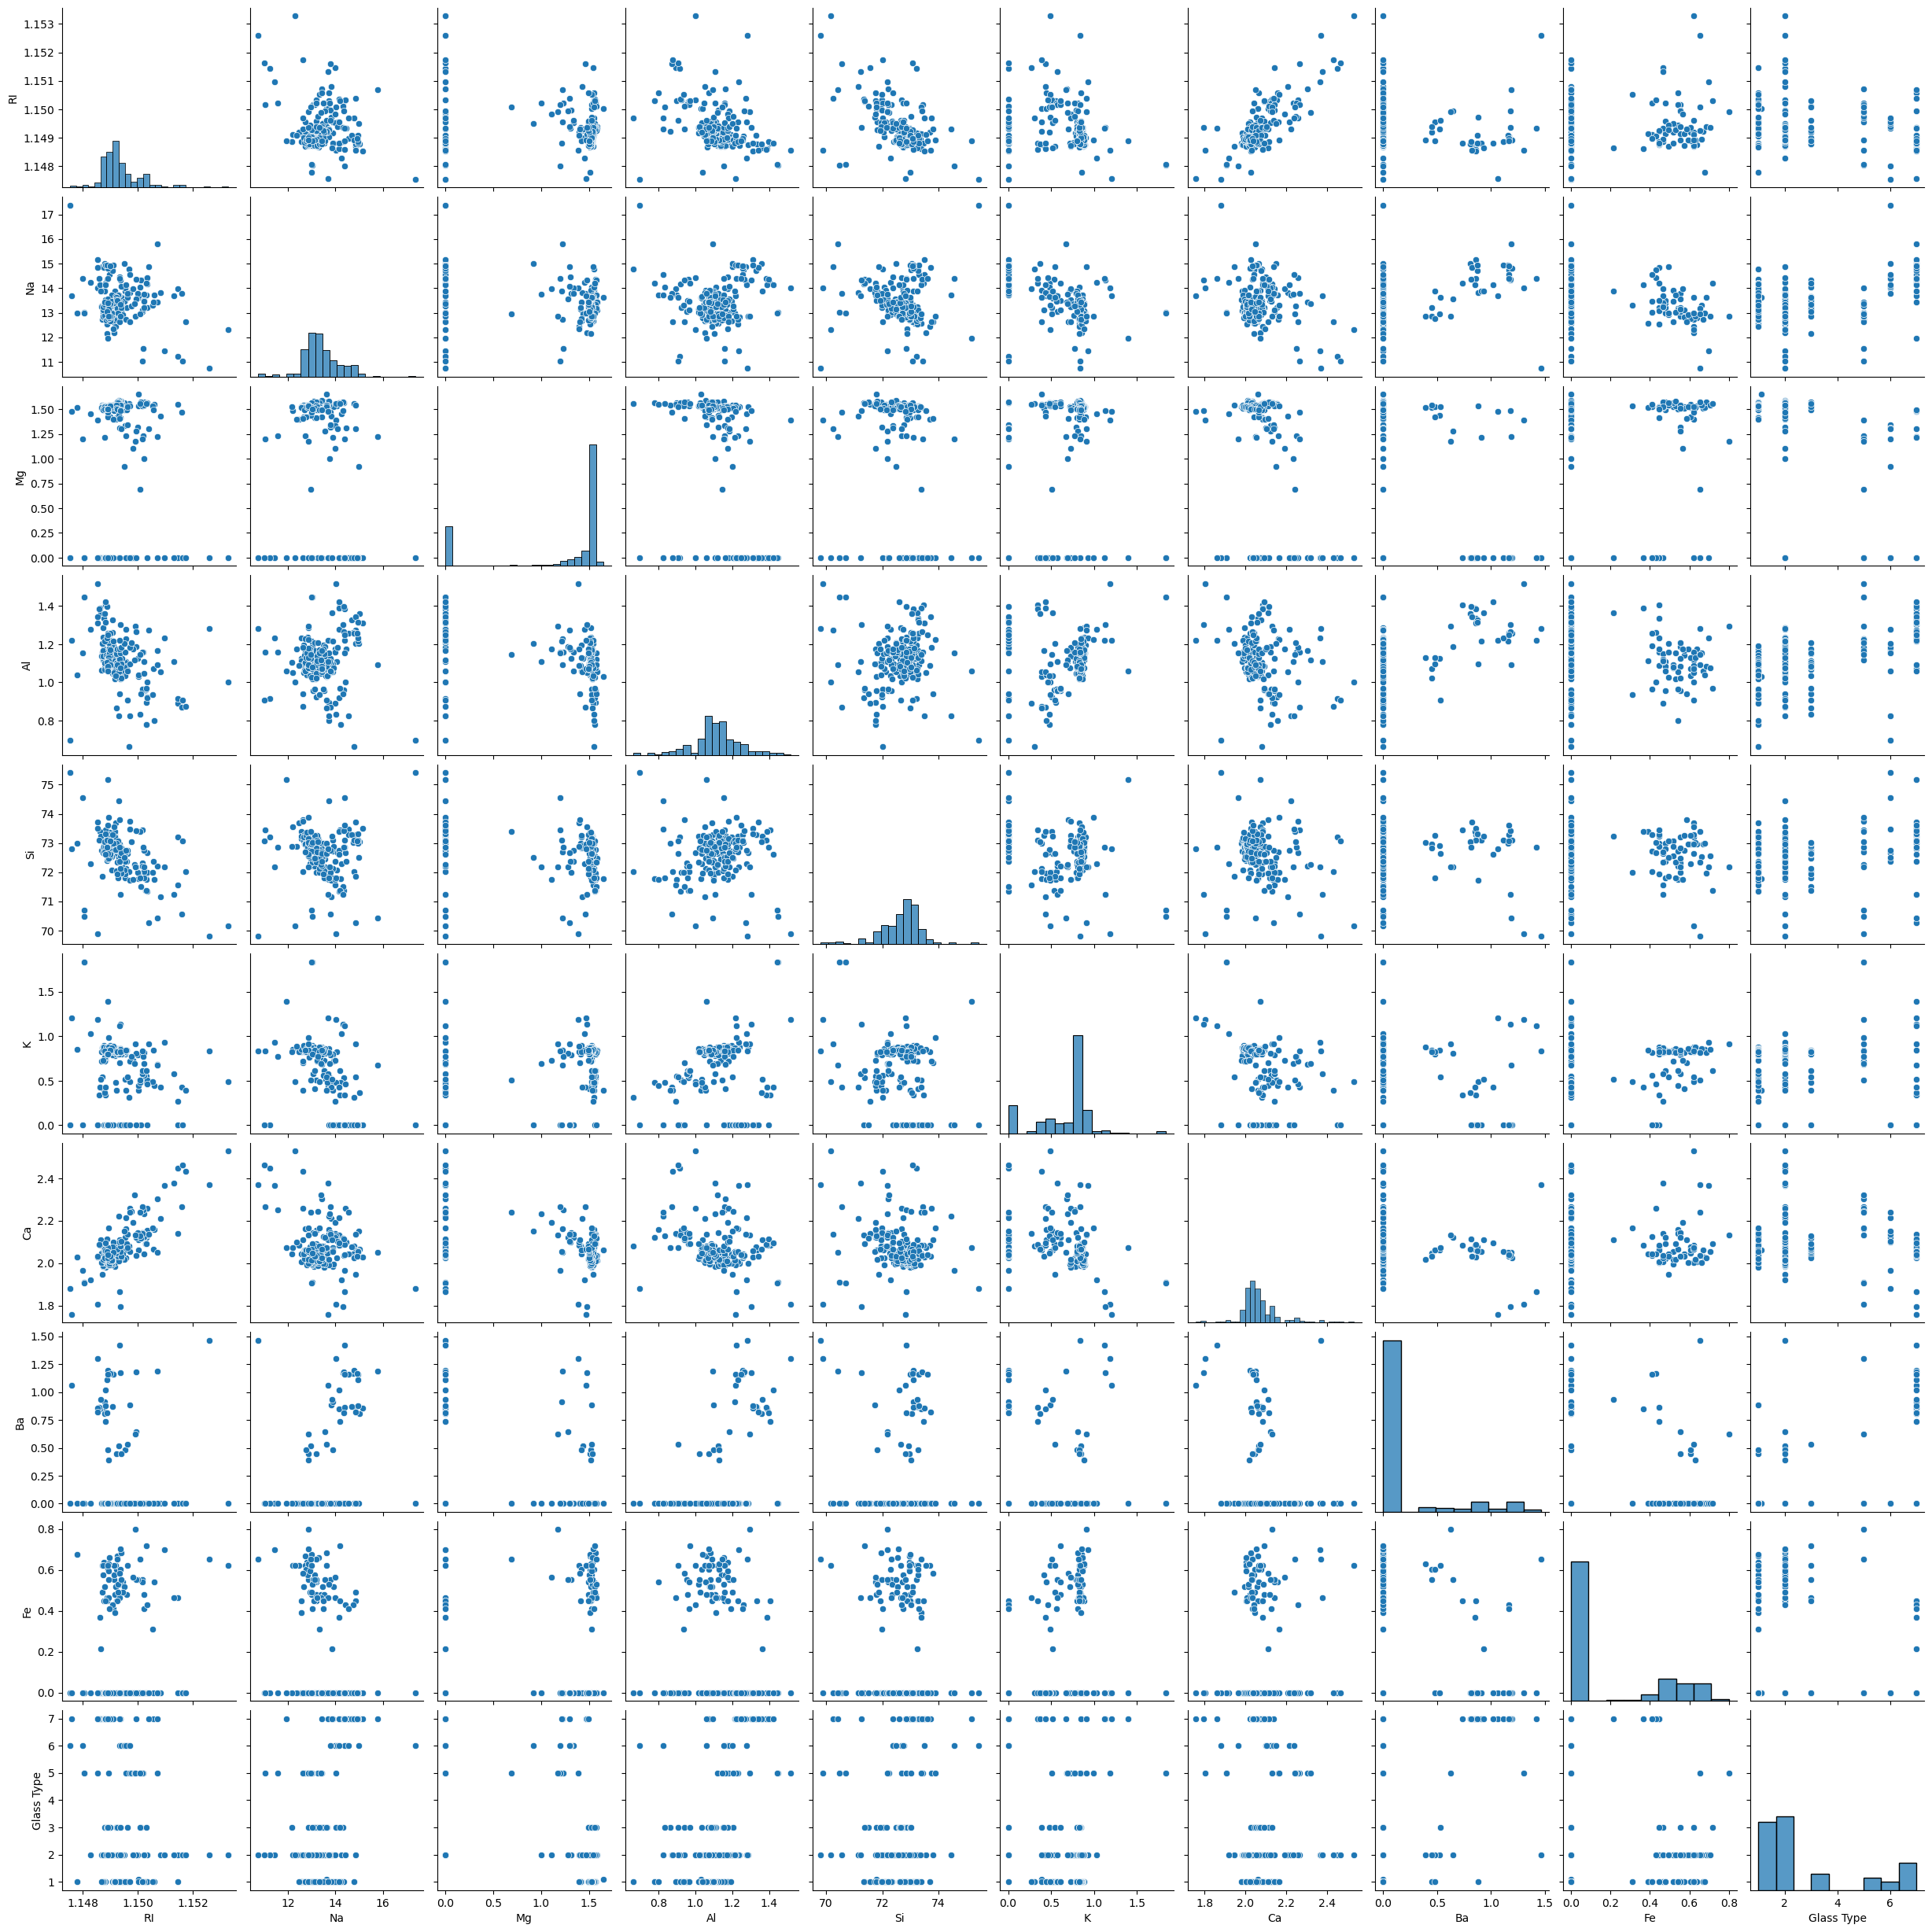

In [35]:
# plotting pairplot of df
sns.pairplot(df)
plt.show()

# Checking and dealing with outliers

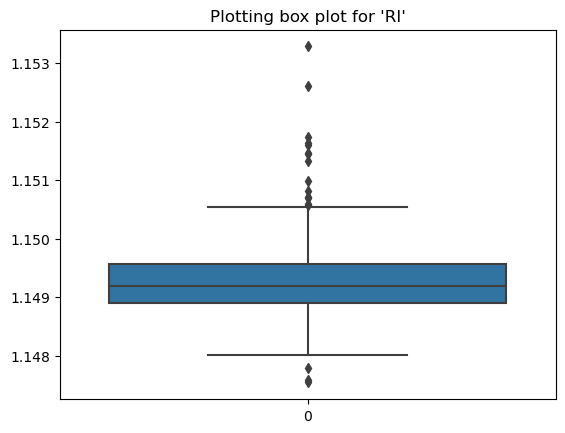

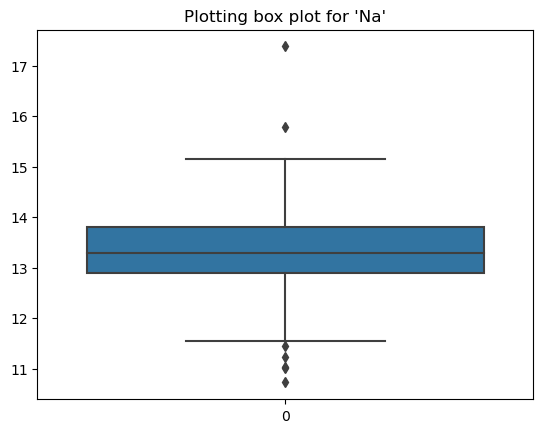

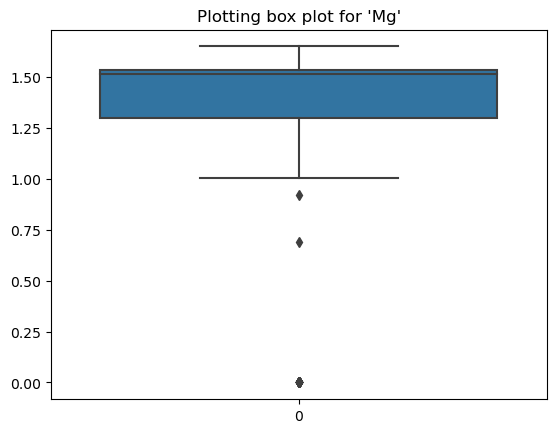

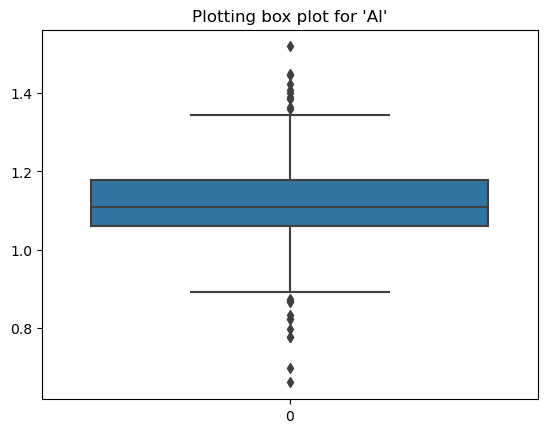

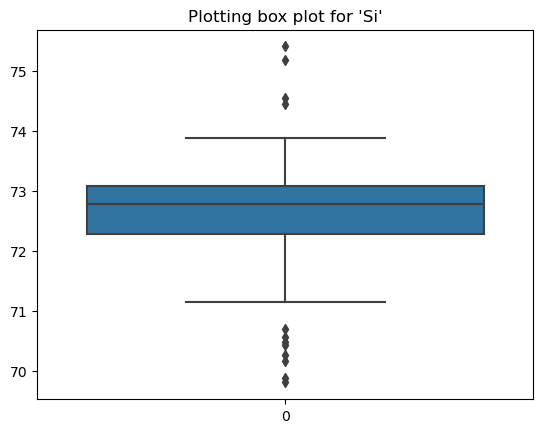

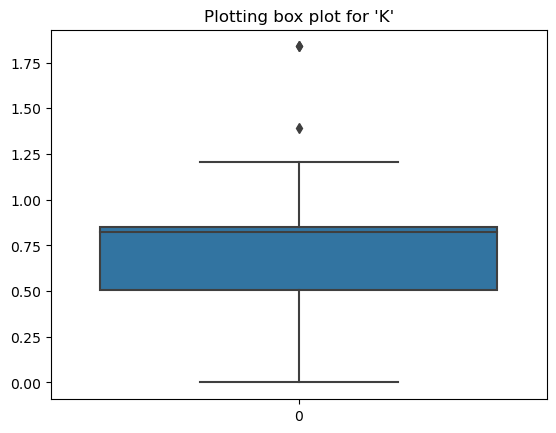

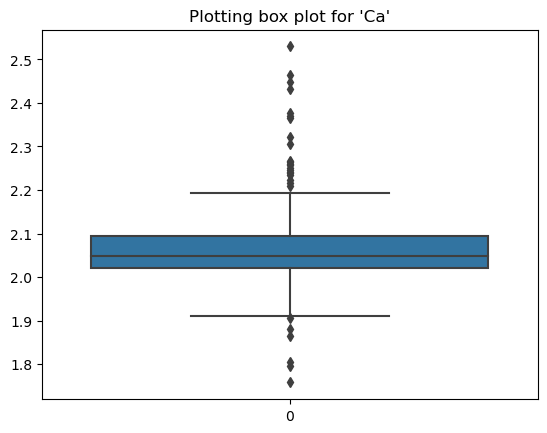

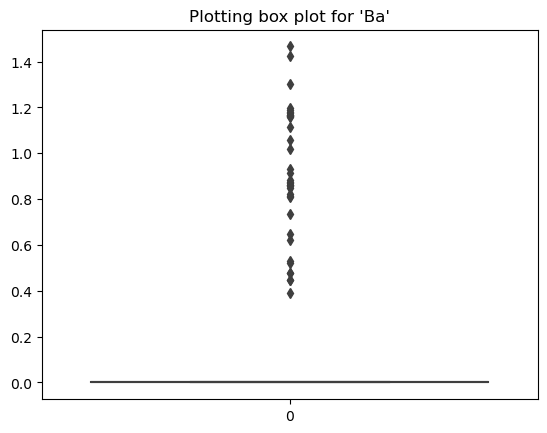

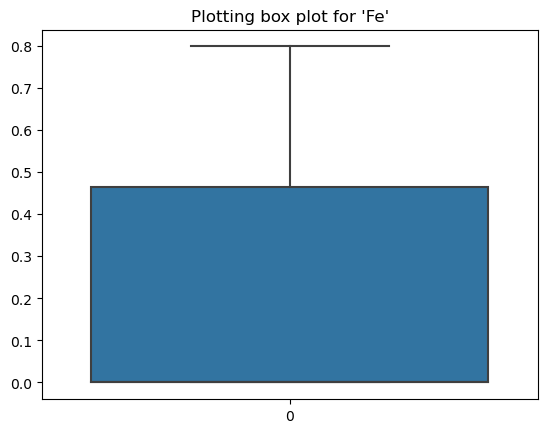

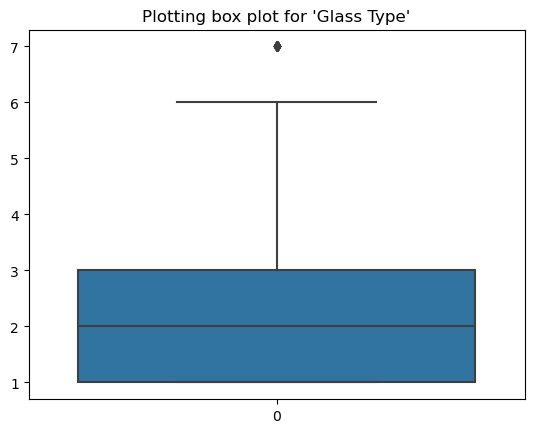

In [36]:
# plotting box plot for checking the outliers present or not
for i in df.columns:
    plt.title(f"Plotting box plot for '{i}'")
    sns.boxplot(df[i])
    plt.show()

## Removing outliers by using IQR (Interquartile) method

### for 'RI' col

In [37]:
# finding the 25th and 75th percentile
ri25 = df['RI'].quantile(.25)
ri75 = df['RI'].quantile(.75)
print(ri25)
print(ri75)

1.148901282054562
1.149567575289593


In [38]:
# finding the IQR
ri_iqr = ri75 - ri25
ri_iqr

0.0006662932350309791

In [39]:
# finding the upper and lower limit
ri_upper = ri75 + 1.5 * ri_iqr
ri_lower = ri25 - 1.5 * ri_iqr
print(ri_upper)
print(ri_lower)

1.1505670151421397
1.1479018422020157


### Capping 

In [40]:
df['RI'] = np.where(
    df['RI'] > ri_upper, ri_upper,
    np.where(
        df['RI'] < ri_lower, ri_lower,
        df['RI']
    )
)

<Axes: >

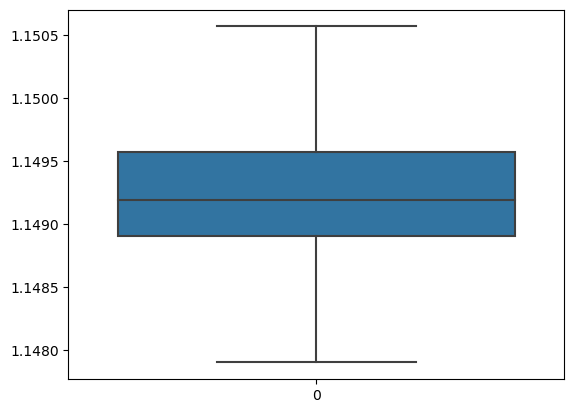

In [41]:
# rechecking the outlier of 'RI' col
sns.boxplot(df['RI'])

### for 'Na' col

In [42]:
# finding the 25th and 75th percentile
na25 = df['Na'].quantile(.25)
na75 = df['Na'].quantile(.75)
print(na25)
print(na75)

12.9
13.81


In [43]:
# finding the IQR
na_iqr = na75 - na25
na_iqr

0.9100000000000001

In [44]:
# finding the upper and lower limit
na_upper = na75 + 1.5 * na_iqr
na_lower = na25 - 1.5 * na_iqr
print(na_upper)
print(na_lower)

15.175
11.535


### Capping

In [45]:
df['Na'] = np.where(
    df['Na'] > na_upper, na_upper,
    np.where(
        df['Na'] < na_lower, na_lower,
        df['Na']
    )
)

<Axes: >

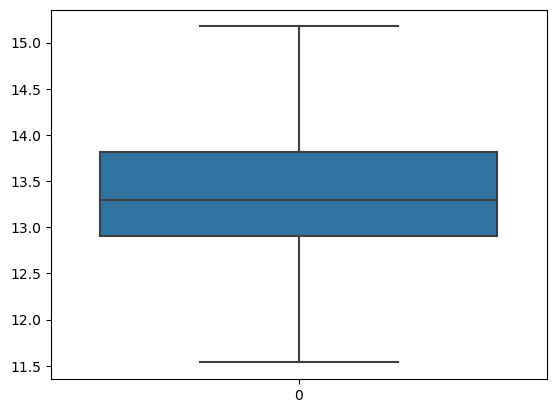

In [46]:
# rechecking the outliers in 'Na' col
sns.boxplot(df['Na'])

### for 'Mg' col

In [47]:
# finding the 25th and 75th percentile
mg25 = df['Mg'].quantile(.25)
mg75 = df['Mg'].quantile(.75)
print(mg25)
print(mg75)

1.2986178604402843
1.5326188647871062


In [48]:
# finding the IQR
mg_iqr = mg75 - mg25
mg_iqr

0.23400100434682192

In [49]:
# finging the upper and lower limit
mg_upper = mg75 + 1.5 * mg_iqr
mg_lower = mg25 - 1.5 * mg_iqr
print(mg_upper)
print(mg_lower)

1.8836203713073392
0.9476163539200514


### Capping

In [50]:
df['Mg'] = np.where(
    df['Mg'] > mg_upper, mg_upper,
    np.where(
        df['Mg'] < mg_lower, mg_lower,
        df['Mg']
    )
)

<Axes: >

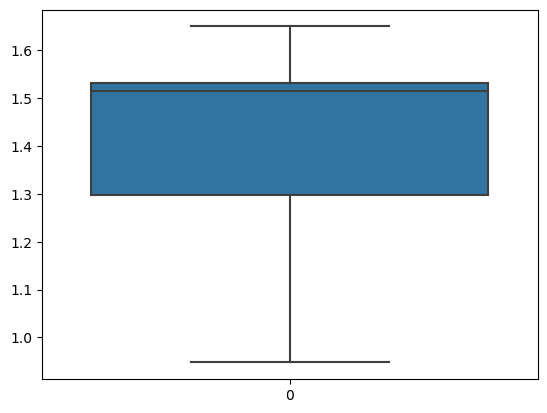

In [51]:
# rechecking outliers of 'Mg' col
sns.boxplot(df['Mg'])

### for 'Al' col

In [52]:
# finding 25th and 75th percentile
al25 = df['Al'].quantile(.25)
al75 = df['Al'].quantile(.75)
print(al25)
print(al75)

1.0596985021248146
1.1768719218995578


In [53]:
# finding IQR 
al_iqr = al75 - al25
al_iqr

0.11717341977474316

In [54]:
# finding the upper and lower limit
al_upper = al75 + 1.5 * al_iqr
al_lower = al25 - 1.5 * al_iqr
print(al_upper)
print(al_lower)

1.3526320515616725
0.8839383724626999


### Capping

In [55]:
df['Al'] = np.where(
    df['Al'] > al_upper, al_upper,
    np.where(
        df['Al'] < al_lower, al_lower,
        df['Al']
    )
)

<Axes: >

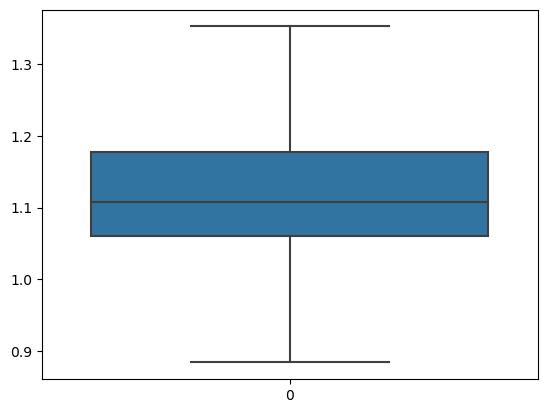

In [56]:
# rechecking the outliers of 'Al' col
sns.boxplot(df['Al'])

### for 'Si' col

In [57]:
# finding the 25th and 75th percentile
si25 = df['Si'].quantile(.25)
si75 = df['Si'].quantile(.75)
print(si25)
print(si75)

72.28
73.08


In [58]:
# finding the IQR
si_iqr = si75 - si25
si_iqr

0.7999999999999972

In [59]:
# finding the upper and lower limit
si_upper = si75 + 1.5 * si_iqr
si_lower = si25 - 1.5 * si_iqr
print(si_upper)
print(si_lower)

74.28
71.08000000000001


### Capping 

In [60]:
df['Si'] = np.where(
    df['Si'] > si_upper, si_upper,
    np.where(
        df['Si'] < si_lower, si_lower,
        df['Si']
    )
)

<Axes: >

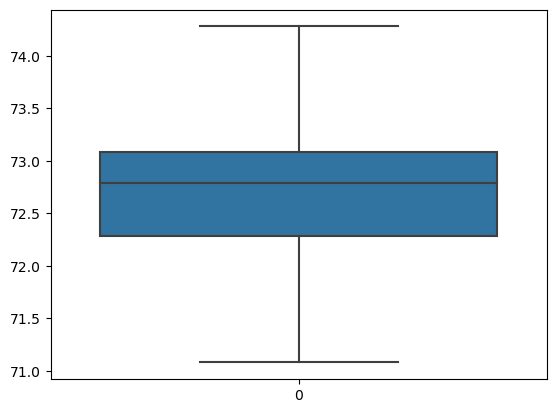

In [61]:
# rechecking the outliers of 'Si' col
sns.boxplot(df['Si'])

### for 'Ca' col

In [62]:
# finding the 25th and 75th percentile
ca25 = df['Ca'].quantile(.25)
ca75 = df['Ca'].quantile(.75)
print(ca25)
print(ca75)

2.0198032680999223
2.093859614072666


In [63]:
# finding IQR
ca_iqr = ca75 - ca25
ca_iqr

0.07405634597274391

In [64]:
# finding the upper and lower limit
ca_upper = ca75 + 1.5 * ca_iqr
ca_lower = ca25 - 1.5 * ca_iqr
print(ca_upper)
print(ca_lower)

2.2049441330317823
1.9087187491408064


### Capping

In [65]:
df['Ca'] = np.where(
    df['Ca'] > ca_upper, ca_upper,
    np.where(
        df['Ca'] < ca_lower, ca_lower,
        df['Ca']
    )
)

<Axes: >

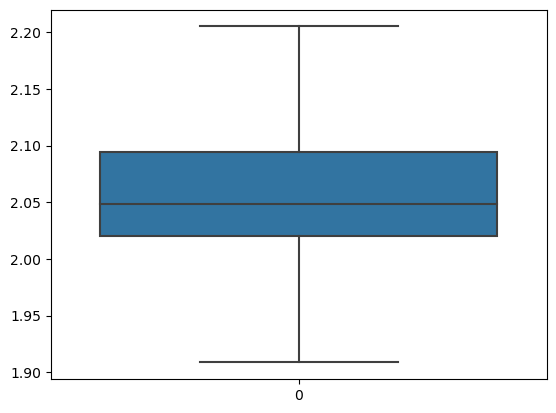

In [66]:
# rechecking the outliers of 'Ca' col
sns.boxplot(df['Ca'])

### for 'Ba' col

In [67]:
# finding 25th and 75th percentile
ba25 = df['Ba'].quantile(.25)
ba75 = df['Ba'].quantile(.75)
print(ba25)
print(ba75)

0.0
0.0


In [68]:
# checking the correlaton of 'Ba' col with 'Glass Type':
df[['Ba','Glass Type']].corr()

Ba  Glass Type
Ba          1.000000    0.655182
Glass Type  0.655182    1.000000

# Creating model

In [69]:
df['Glass Type'] = np.where(df['Glass Type'] <= 4, 0, 1)

In [70]:
# creating the x variable for storing the input data
x = df.iloc[:,:-1]
x.head(2)

RI     Na        Mg        Al     Si         K        Ca   Ba   Fe
0  1.150034  13.64  1.649740  1.032280  71.78  0.391487  2.060643  0.0  0.0
1  1.149176  13.89  1.532619  1.107932  72.73  0.782974  1.985732  0.0  0.0

In [71]:
# creating the y variable for storing the output data
y = df.iloc[:,-1:]
y.head()

Glass Type
0           0
1           0
2           0
3           0
4           0

In [72]:
# creating the training and testing data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .30, random_state = 45)

In [73]:
# checking the shape of x_train and x_test
print(x_train.shape)
print(x_test.shape)

(149, 9)
(64, 9)


In [74]:
# checking the shape of y_train, y_test
print(y_train.shape)
print(y_test.shape)

(149, 1)
(64, 1)


### Trying Naive Bayes MultinomialNB

In [75]:
# calling the MultinomialNB class
mnb = MultinomialNB()
mnb

MultinomialNB()

In [76]:
# training the model using the fit method with x_train and y_train
mnb.fit(x_train, y_train)

MultinomialNB()

In [77]:
# prediction variable
predmnb = mnb.predict(x_test)
predmnb

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0])

In [78]:
# checking the accuracy score
print(accuracy_score(y_test, predmnb))

0.953125


In [79]:
# checking the confusion matrix
print(confusion_matrix(y_test, predmnb))

[[54  1]
 [ 2  7]]


In [80]:
# checking the classification report
print(classification_report(y_test, predmnb))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        55
           1       0.88      0.78      0.82         9

    accuracy                           0.95        64
   macro avg       0.92      0.88      0.90        64
weighted avg       0.95      0.95      0.95        64



In [81]:
# creating a function for testing the model
def pred_mnb(a):
    a = a.reshape(1, -1)
    b = mnb.predict(a)
    print(b)
    if b == 0:
        print('This one is "Window Glass"')
    elif b == 1:
        print('This one is "Non-window Glass"')

In [82]:
# testing with a sample data
a = np.array([1.148871,14.37,0.947616,1.352632,72.85,0.000000,2.114190,0.814325,0.0])
pred_mnb(a)

[1]
This one is "Non-window Glass"


### Trying Naive Bayes GaussianNB 

In [83]:
# calling the GaussianNB class
gnb = GaussianNB()
gnb

GaussianNB()

In [84]:
# training the model using fit method
gnb.fit(x_train, y_train)

GaussianNB()

In [85]:
# prediction variable
predgnb = gnb.predict(x_test)
predgnb

array([0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0])

In [86]:
# checking the accuracy score
print(accuracy_score(y_test, predgnb))

0.9375


In [87]:
# checking the confusion matrix
print(confusion_matrix(y_test, predgnb))

[[52  3]
 [ 1  8]]


In [88]:
# checking the classification report
print(classification_report(y_test, predgnb))

              precision    recall  f1-score   support

           0       0.98      0.95      0.96        55
           1       0.73      0.89      0.80         9

    accuracy                           0.94        64
   macro avg       0.85      0.92      0.88        64
weighted avg       0.95      0.94      0.94        64



In [89]:
# creating a function for testing our model
def pred_gnb(c):
    c = c.reshape(1, -1)
    d = gnb.predict(c)
    print(d)
    if d == 0:
        print('This one is "Window Glass"')
    elif d == 1:
        print('This one is "Non-window Glass"')

In [90]:
# testing with a sample data
c = np.array([1.148871,14.37,0.947616,1.352632,72.85,0.000000,2.114190,0.814325,0.0])
pred_gnb(c)

[1]
This one is "Non-window Glass"


### Trying the DecisionTree 

In [91]:
# calling the DecisionTree class
dtc = DecisionTreeClassifier()
dtc

DecisionTreeClassifier()

In [92]:
# training the model using fit method
dtc.fit(x_train, y_train)

DecisionTreeClassifier()

In [93]:
# prediction variable
preddtc = dtc.predict(x_test)
preddtc

array([0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0])

In [94]:
# checking the accuracy score
print(accuracy_score(y_test, preddtc))

0.9375


In [95]:
# checking the confusion matrix
print(confusion_matrix(y_test, preddtc))

[[52  3]
 [ 1  8]]


In [96]:
# checking the classification report
print(classification_report(y_test, preddtc))

              precision    recall  f1-score   support

           0       0.98      0.95      0.96        55
           1       0.73      0.89      0.80         9

    accuracy                           0.94        64
   macro avg       0.85      0.92      0.88        64
weighted avg       0.95      0.94      0.94        64



In [97]:
# creating a function for testing the model
def pred_dtc(e):
    e = e.reshape(1, -1)
    f = dtc.predict(e)
    print(f)
    if f == 0:
        print('This one is "Window Glass"')
    elif f == 1:
        print('This one is "Non-window Glass"')

In [98]:
# testing with a sample data
e = np.array([1.148871,14.37,0.947616,1.352632,72.85,0.000000,2.114190,0.814325,0.0])
pred_mnb(e)

[1]
This one is "Non-window Glass"


### Trying SVM

In [99]:
# calling the SVC class
svc = SVC()
svc

SVC()

In [100]:
# training the model using fit method
svc.fit(x_train, y_train)

SVC()

In [101]:
# prediction variable
predsvc = svc.predict(x_test)
predsvc

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [102]:
# checking the accuracy score
print(accuracy_score(y_test, predsvc))

0.859375


In [103]:
# checking the confusion matrix
print(confusion_matrix(y_test, predsvc))

[[55  0]
 [ 9  0]]


In [104]:
# checking the classification report
print(classification_report(y_test, predsvc))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92        55
           1       0.00      0.00      0.00         9

    accuracy                           0.86        64
   macro avg       0.43      0.50      0.46        64
weighted avg       0.74      0.86      0.79        64



In [105]:
# creating a function for testing 
def pred_svc(g):
    g = g.reshape(1, -1)
    h = svc.predict(g)
    print(h)
    if h == 0:
        print('This one is "Window Glass"')
    elif h == 1:
        print('This one is "Non-window Glass"')

In [106]:
# changing the sample data different then above ones for checking the performance
g = np.array([1.148742,12.88,1.508104,1.118689,73.28,0.883656,2.004158,0.000000,0.621447])
pred_svc(g)

[0]
This one is "Window Glass"


### Trying KNN

In [107]:
# calling the KNN class
knn = KNeighborsClassifier()
knn

KNeighborsClassifier()

In [108]:
# training the model using fit method
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [109]:
# prediction variable
predknn = knn.predict(x_test)
predknn

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0])

In [110]:
# checking the accuracy score
print(accuracy_score(y_test, predknn))

0.984375


In [111]:
# checking the confusion matrix
print(confusion_matrix(y_test, predknn))

[[55  0]
 [ 1  8]]


In [112]:
# checking the classification report
print(classification_report(y_test, predknn))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        55
           1       1.00      0.89      0.94         9

    accuracy                           0.98        64
   macro avg       0.99      0.94      0.97        64
weighted avg       0.98      0.98      0.98        64



In [113]:
# creating a function for testing our model
def pred_knn(i):
    i = i.reshape(1, -1)
    j = knn.predict(i)
    print(j)
    if j == 0:
        print('This one is "Window Glass"')
    elif j == 1:
        print('This one is "Non-window Glass"')

In [114]:
# changing the sample data different then above ones for checking the performance
i = np.array([1.148742,12.88,1.508104,1.118689,73.28,0.883656,2.004158,0.000000,0.621447])
pred_svc(i)

[0]
This one is "Window Glass"


# Saving the best model

In [115]:
import joblib

# saving the model as object file
joblib.dump(knn, 'glass_prediction_knn.obj')

# load the model to make predictions
knn_from_joblib = joblib.load('glass_prediction_knn.obj')

# use the loaded model to make prediction
knn_from_joblib.predict(x_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0])